# **Technical Final Report - Amy Gibbon and Joe Garvey**
*It is recommended that this report is read in a Jupyter Notebook, and it is written to be read in such a format.*

# Introduction

 LiFETIME are a startup company looking to enable the second-life use of Lithium-ion batteries. Currently, batteries, especially those used in EVs, are deemed to reach “end-of-life” (EOL) when their maximum battery capacity falls to 70-80% of their rated value. LiFETIME aim to provide a low-cost, open-source solution for cell health testing for second-life battery applications. This device will measure how much future potential a battery still has left, allowing the operator to decide whether it can continue to be used, and in what environments or use cases it can be used. While LiFETIME focus on the hardware of their design, the task given for the GM2 project is an investigation into developing a model suitable for practical analysis of real-world cells. The brief was broad, with there being a plethora of methods of cell health analysis, so the first objective was to review existing literature on lithium-ion cell modelling, and better familiarise ourselves with the physics of battery degradation. Following a combination of discussion with LiFTIME and literature review it was concluded that there are two potential routes we could pursue, either Electrochemical Impedance Spectroscopy (EIS) data, or Incremental Capacity Analysis (ICA), both of which will be outlined in this report. This progressed into a brief analysis of equivalent circuit modelling (ECM), as a method of analysing EIS data. The team has collected sufficient primary data to allow us test the aforementioned analysis techniques. Prior to our project, the data had not yet been used for any application other than for model validation. Because of time limitations, our project has focused on delivering key research, analysis of data and preliminary investigation into ICA, EIS and ECM, rather than attempting to deliver a model.


## Definitions, abbreviations and symbols

*   **EIS:** Electrochemical Impedance Spectroscopy
*   **ICA:** Incremental Capacity Analysis
*   **ECM:** Equivalent circuit model
*   **SOH:** State of health
*   **SOC:** State of charge




## Project outline: Weeks 1 and 2

We established an initial task set to pursue. The aim is that these tasks will give a better understanding of the problem and what potential routes should be pursued before we complete a full task set.

Tasks:

1. Meet with LiFETIME, and get an idea of what is important to the team, and how they imagine our project progressing.
1. Complete a literature review of key areas related to the project, including modes of battery degradation, ICA and EIS
1. Evaluate whether EIS or ICA is a better route to pursue.
1. Using lessons learnt from discussion and research, assess appropriate next steps for weeks 3 and 4.  


# Background - *Amy*

### Lithium-ion battery degradation
Lithium-ion battery degradation is incredibly complex. Below is a brief cheat sheet to key routes of degradation, to give context to the problem we are trying to assess.


**Key degradation modes of Lithium-ion batteries:**

- **LLI:** Loss of lithium inventory
- **LAM:** Loss of active materials
- **ORI:** Ohmic resistance increase
- **FRD:** Faradic Rate Degradation

**SEI layer formation**
* Permanently binds some lithium
* Reduces capacity as less Li+ available to move

**Lithium plating**
* Occurs when charging at cold temperatures or fast charging
* Graphite can’t accept the Li+ well or quickly enough so Li builds up as a plate
* This can lead to dendritic formation which can even stretch across the electrolyte and through the separator to cause short circuiting

**Particle fracture**
* Caused by thermal cycling
* Opens up more surface area for SEI to occur leading to more capacity loss

**Structural disordering**
* Happens in the presence of moisture
* Electrolyte reacts to form acidic HF
* This acid then reacts with the lithium oxide at the cathode, causing loss of electrolyte and reducing Li availability

![](https://pubs.rsc.org/image/article/2021/CP/d1cp00359c/d1cp00359c-f1_hi-res.gif)

**Reference:** Edge, Jacqueline & O'Kane, Simon & Prosser, Ryan & Kirkaldy, Niall & Patel, Anisha & Hales, Alastair & Ghosh, Abir & Ai, Weilong & Chen, Jingyi & Jiang, Jason & Li, Shen & Pang, Mei-Chin & Bravo Diaz, Laura & Tomaszewska, Anna & Marzook, Mohamed & Radhakrishnan, Karthik & Wang, Huizhi & Patel, Yatish & Wu, Billy & Offer, Gregory. (2021). Lithium Ion Battery Degradation: What you need to know. Physical Chemistry Chemical Physics. 23. 10.1039/D1CP00359C.

### Electrochemical Impedance Spectroscopy
Electrochemical Impedance Spectroscopy (EIS) is a method of spectroscopy that will be considered in this report. It detects the electrochemical reaction happening in the battery. An electric signal is applied with various frequencies to the battery system, giving an output that is a spectrum with a real and imaginary part, capturing the change in resistance of the battery. It is important to note that different frequencies correlate with different elements of the battery, and that the EIS spectrum is a Nyquist plot as a function of frequency, highlighting the different corresponding physical components. It is non-invasive to obtain spectrum, causing no damage to battery, and it can be done quickly in just 10-15 minutes. EIS spectrum changes with cycle number, making it a good indicator of degradation and SOH (State of Health). EIS data is usually interpreted using an equivalent circuit model (ECM), with a different ECM being required for each battery system (Middlemiss et al., 2020).The circuit model described by Westerhoff

## Project outline: Weeks 3 and 4

Following our research and improved understanding of the problem, as well as discussion with LiFETIME, we have identified the following set of tasks as being the most important, and what we plan to pursue.

Tasks:

1. Clean, process and visualise the cycling data. Investigate how capacity changes with cycle number.
1. Clean, process and visualise the EIS data. Investigate how the EIS changes with cycle number.
1. Choose an ECM, using literature and our EIS data. Either replicate an ECM from literature, or create a unique one to match our EIS data.
1. Get a good picture of how each ECM component links to a physical aspect of the cell through literature review. Document this well.
1. Have a go at fitting the parameters of the ECM for a single SOC, cycle number and battery type
1. Investigate whether the ECM is valid for the other battery types, find the error quantitively
1. Investigate how the parameters change with SOC and cycle number
1. Develop an algorithm that takes an EIS spectrum, fits the parameters of the ECM found earlier, and returns the error between the expected parameters and the actual parameters. Use the research on the physical link between ECM components and cell components to output an indication of what areas of the cell have unusual readings and therefore may be degrading, and to what extent. This may be tricky without any data for this, so we might need to find some online or create some.
1. Investigate whether it is possible to estimate current capacity of a cell from a single EIS reading, by finding the ECM and virtually cycling the model, producing a curve, and calculating capacity from that. This could be really powerful if possible, but would require strong understanding of how the model parameters change as the cell charges/discharges.

The tasks are in order of priority. From conversation with LiFETIME, completing tasks 1 and 2 would be good result. Reaching task 5 would be excellent, and the further analysis of tasks 6 and 7 would be a bonus. We agree that it is unlikely tasks 7 and 8 will be completed given our limited timeframe, however they will be discussed given recommendations for future work.

### Imports and installs

In [83]:
#@title Import GitHub Repository
#author = Joe
import os

# Add data files to the repository if not already present.
repo_url = "https://github.com/Technology-for-the-Poorest-Billion/2024-LiFETIME"
repo_dir = "2024-LiFETIME"

# Check if repository exists - if you accidentally run this twice it
# won't take 2 minutes to clone the repository to within itself.
if not os.path.isdir(repo_dir):
  # Clone the repo if it doesn't.
  !git clone {repo_url}
else:
   print(f"The directory '{repo_dir}' already exists, skipping clone.")

# Change folder to repository directory.
%cd {repo_dir}

# alternative that is potentially faster but that
# only works for one file at a time is using
# !wget https://raw.githubusercontent.com/ (repository)

Cloning into '2024-LiFETIME'...
remote: Enumerating objects: 780, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 780 (delta 38), reused 79 (delta 36), pack-reused 699
Receiving objects: 100% (780/780), 372.37 MiB | 9.80 MiB/s, done.
Resolving deltas: 100% (379/379), done.
Updating files: 100% (129/129), done.
/content/2024-LiFETIME/2024-LiFETIME


In [84]:
#@title Import Python Libraries

#author = Joe
import sys
!{sys.executable} -m pip install -r requirements.txt
!pip install -U kaleido
!pip install -U impedance

#author - shared
import pandas as pd
import glob
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
import pandas as pd
import numpy as np
from impedance.models.circuits import CustomCircuit
from impedance import preprocessing
from impedance.visualization import plot_nyquist
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import os
import plotly.graph_objects as go
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
import matplotlib as plt
import scipy
from scipy.optimize import curve_fit
from plotly.subplots import make_subplots

  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
  Using cached scipy-1.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [85]:
#@title Import Cycling Data
#author - Joe
data_directory = 'Data/Cycling/'
# Iterate through every folder and sub-folder in the specified directory looking for text files.
files = glob.iglob(data_directory +'**/*.txt', recursive=True)
Cycling_Tests = dict()

# Convert the csv files into pandas dataframes, and store in a dictionary with (Key=cell_date):(dataframe)
def retrieve_files():
    dataset = dict()
    for f in files:
        columns = ['time/s', 'Ecell/V', 'I/mA', 'Temperature/°C', 'cycle number']
        temp_df = pd.read_csv(f, sep='\t', usecols=columns, encoding='ISO-8859-1')
        dataset[os.path.basename(f)[3:17]] = temp_df # trims the key for use in the dictionary
        print(f'Successfully imported test {os.path.basename(f)[3:17]} with shape {temp_df.shape}')
    return dataset

Cycling_Tests = retrieve_files()
print("Done")

Successfully imported test SG007_21-08-23 with shape (460741, 5)
Successfully imported test SG008_31-07-23 with shape (116828, 5)
Successfully imported test NX002_31-07-23 with shape (120808, 5)
Successfully imported test NX002_21-08-23 with shape (268652, 5)
Successfully imported test RS006_31-07-23 with shape (120383, 5)
Successfully imported test RS006_21-08-23 with shape (229161, 5)
Successfully imported test SG007_07-02-24 with shape (645535, 5)
Successfully imported test SG007_21-08-23 with shape (460741, 5)
Successfully imported test SG007_31-07-23 with shape (115995, 5)
Successfully imported test SG003_07-02-23 with shape (693003, 5)
Successfully imported test RS001_31-07-23 with shape (120465, 5)
Successfully imported test RS001_21-08-23 with shape (228545, 5)
Successfully imported test NX006_31-07-23 with shape (120806, 5)
Successfully imported test NX006_21-08-23 with shape (207146, 5)
Successfully imported test NX001_31-07-23 with shape (120655, 5)
Successfully imported tes

In [86]:
#@title Import EIS data
#author - Amy, modified from above
files = glob.iglob('Data/EIS_Data/**/*_clean.txt', recursive=True)
all_EIS = {os.path.basename(f)[:10]: pd.read_csv(f, sep='\t', header=None, skiprows=1, names=["|Z|/Ohm", "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm", "cycle number"]) for f in files}

#To call a df: eg all_EIS['NX001_2108']

## Capacity analysis *- Joe*

Code in this section is able to generate interactive and static plots showing the cell cycles and capacity by test, cell and cell type.

I have written it in such a way that it will work for any future data LiFETIME generate, as it works off the naming scheme of the data.

The utilities section collates all functions that do the "maths" and data filtering behind the scenes.

"Plotting" contains all plotly code.

"Run Analysis" contains all function calls to calculate relevant data and then iterate through the database to plot whatever you specify to a file. Examples of what you could plot are left in the comments, although there's plenty more that you could specify.

Plots created by this code are in the GitHub so that you don't have to run the code yourself and to keep this notebook concise as there are 34 different plots with the current dataset. Some are fairly computationally intensive (those with time axes) and so show_fig is set to false by default when exporting the plot to a file.

In [ ]:
#@title Utilities
def add_dates(dataset):
    """
    Copies date from key to a column in the dataframe.
    Args:
    dataset (dict): Contains {Key with date of cell test}:{Data from test}
    """
    # For test in collection of tests
    for key, df in dataset.items():
        # Add the end of the key (which just contains the date) to the column "date"
        df['date'] = pd.to_datetime(key[6:])
    return dataset

def filter_dataset(dataset, partial_key):
    """
    Returns a subset of the dataset containing only items matching the key specified.
    Args:
    dataset (dict): The dataset to filter.
    partial_key (str): The partial key (usually cell name) to match.
    """
    filtered_dataset = dict()
    # iterate over all items in the dataset
    for key, v in dataset.items():
        if partial_key in key: # eg. "SG009" would be in SG009_23-04-23
            filtered_dataset[key] = v # Add that entry to the filtered dataset
    return filtered_dataset

def combine_tests(dataset):
    """
    Returns a single dataframe with all tests performed on that cell.
    Cycle numbers and times are updated to reflect "total time spent under test conditions".
    This neglects any time elapsed between tests.
    Args:
    dataset (dict): Contains only tests (key:dataset pairs) performed on the same cell.
    """
    # Pulls the list of keys from the dictionary, extracts the test date and sorts in chronological order.
    sorted_keys = sorted(dataset.keys(), key=lambda x: pd.to_datetime(x[6:]))
    # there's probably a better way of doing this, but since the codes contain the date might as well do it this way.
    dataframes_temp = []
    cumulative_time = 0
    cumulative_cycles = 0
    # for every test performed on the cell
    for key in sorted_keys:
        df = dataset[key] # copy the dataframe to the temp variable
        df['time/s'] = df['time/s'] + cumulative_time # update the time to reflect elapsed test time.
        df['cycle number'] = df['cycle number'] + cumulative_cycles # update the cycle no. to reflect elapsed cycles.
        cumulative_time = df['time/s'].max() # set the cumulative time for the next iteration.
        cumulative_cycles = df['cycle number'].max() # set the cumulative cycles to the next iteration.
        dataframes_temp.append(df) # copy this ammended dataframe to the temp list.
    combined_df = pd.concat(dataframes_temp, ignore_index=True) # merge all of the dataframes in the temp list into a single dataframe.
    return combined_df

def add_capacity(df):
    """
    Calculates the cycle capacity in mAh and mWh for a cell test and adds extra columns to the dataframe.
    Returns appended dataframe.
    """
    # Retrospectively, I've realised this is ridiculously inefficient.
    # Rather than merge the dataset, I could have just plotted the capacity vs cycle number directly from this...
    # Potentially saving a few hundred mb of RAM.
    grouped = df.groupby('cycle number')
    capacity = []
    # group the dataset by cycle number
    for cycle, group in grouped: # I'm kind of amazed that this works....
        # Having to debug this to know how/why/what it is doing is why I dislike implicit programming languages.
        group = group[group['I/mA'] < -400] # filter down the group to just the times which are discharging and exclude discharges that aren't tests.
        # discharge tests occur at 500mA minimum.
        times = group['time/s'].values
        currents = group['I/mA'].values
        voltage = group['Ecell/V'].values
        # Take the total dicharge over the cycle * time = capacity in mAh
        capacity_mAh = -np.trapz(currents, times)/3600.0
        # this uses the composite trapezoidal rule, which is apparently more accurate than a simple trapezoidal.
        # I have no idea what the difference is.
        capacity_mWh = -np.trapz(currents*voltage, times)/3600.0
        # I originally tried capacity_mAh * voltage. This doesn't work and creates massive and very wrong datasets.
        capacity.append((cycle, capacity_mAh, capacity_mWh))
    # Merge the capacity vs cycle number and the main dataset.
    capacity_df = pd.DataFrame(capacity, columns=['cycle number', 'capacity/mAh', 'capacity/mWh'])
    df = df.merge(capacity_df, on='cycle number', how='left')
    return df

def add_capacity_dataset(dataset):
    """"
    Adds the capacity column for all items in the dataset.
    Returns updated dataset.
    """
    for key, df in dataset.items():
        df = add_capacity(df) # calculate capacity for the test..
        dataset[key] = df # update this test with the calculated values.
    return dataset

def ListCells(dataset):
    """"
    Lists all unique cell names (cell)(id) in the dataset.
    """
    cells = []
    for item in dataset.keys():
        cell_name = item[0:5]
        if not(cell_name in cells):
            cells.append(cell_name)
    return cells

def ListCellTypes(dataset):
    """"
    Lists all unique cell types in the dataset.
    """
    cells = []
    for item in dataset.keys():
        cell_name = item[0:2]
        if not(cell_name in cells):
            cells.append(cell_name)
    return cells

In [ ]:
#@title Plotting Functions
# this could be made less redundant and more efficient.
def plot_capacity_Wh_allcycles_tohtml(cycle_data, showfig=False):
    """
    Exports plots to HTML (Plot remains interactive). ShowFig outputs to Jupyter, but is slow.
    """
    # DO NOT USE ON LARGE DATASETS > 100k points
    fig = plot_capacity_Wh_allcycles(cycle_data, showfig)
    fig.write_html(data_directory+"/Output/"+cycle_data.name+"_capacity_Wh.html")

def plot_capacity_Wh_allcycles(cycle_data, showfig=True):
    """
    Returns a pyplot figure with Capacity in mWh against cycle number.
    """
    fig = px.line(cycle_data, x=cycle_data['cycle number'], y=cycle_data['capacity/mWh'], color='date')
    if(showfig): fig.show()
    return fig


def plot_capacity_allcycles_tohtml(cycle_data, showfig=False):
    """
    Exports plots to HTML (Plot remains interactive). ShowFig outputs to Jupyter, but is slow.
    """
    # DO NOT USE ON LARGE DATASETS > 100k points
    fig = plot_capacity_allcycles(cycle_data, showfig)
    fig.write_html(data_directory+"/Output/"+cycle_data.name+"_capacity.html")

def plot_capacity_allcycles_tosvg(cycle_data, showfig=False):
    """
    Exports plots to SVG (Static Vector Plot), ShowFig outputs to Jupyter, but is slow.
    """
    # DO NOT USE ON LARGE DATASETS > 100k points
    fig = plot_capacity_allcycles(cycle_data, showfig)
    fig.write_image(data_directory+"/Output/"+cycle_data.name+"_capacity.svg")

def plot_capacity_allcycles_topdf(cycle_data, showfig=False):
    """
    Exports plots to PDF (Static Vector Plot), ShowFig outputs to Jupyter, but is slow.
    """
    # DO NOT USE ON LARGE DATASETS > 100k points
    fig = plot_capacity_allcycles(cycle_data, showfig)
    fig.write_image(data_directory+"/Output/"+cycle_data.name+"_capacity.pdf")

def plot_capacity_allcycles_topng(cycle_data, showfig=False):
    """
    Exports plots to PNG (Static Image Plot), ShowFig outputs to Jupyter.
    """
    fig = plot_capacity_allcycles(cycle_data, showfig)
    fig.write_image(data_directory+"/Output/"+cycle_data.name+"_capacity.png")

def plot_capacity_allcycles(cycle_data, showfig=True):
    """
    Returns a pyplot figure with Capacity in mAh against cycle number.
    """
    fig = px.line(cycle_data, x=cycle_data['cycle number'], y=cycle_data['capacity/mAh'], color='date')
    if(showfig): fig.show()
    return fig

def plot_capacity_celltype_tohtml(cycle_data, type_name, showfig=False):
    """
    Exports plots to HTML (Plot remains interactive). ShowFig outputs to Jupyter, but is slow.
    """
    # DO NOT USE ON LARGE DATASETS > 100k points
    fig = plot_capacity_celltype(cycle_data, showfig)
    fig.write_html(data_directory+"/Output/"+type_name+"_capacity.html")

def plot_capacity_celltype(capacity_data, showfig=False):
    """
    Outputs a plot with all tests performed on a given cell type.
    Input is a list of pyplot traces.
    """
    fig = go.Figure()
    for df in capacity_data:
        fig.add_trace(go.Line(x=df['cycle number'], y=df['capacity/mWh'], mode='lines'))
    fig.update_xaxes(title_text="Cycle Nmber")
    fig.update_yaxes(title_text="Capacity/mWh")
    fig.update_layout(title_text='Capacity vs. Cycle Number for Multiple Cells')
    if(showfig): fig.show()
    return fig

def output_capacity_Wh_allcycles(cycle_data, cell_name):
    """
    Returns a pyplot trace to be included in a plot with Capacity in mWh against cycle number.
    """
    string = 'capacity/mAh for cell +' + cell_name
    fig= go.Line(x=cycle_data['cycle number'], y=cycle_data['capacity/mAh'], mode='lines', name=string)
    return fig

def plot_cell_voltage(cycle_data):
    """
    Outputs an interactive plot of cell voltage with time. Cycle number indicated by colour.
    """
    fig = px.line(cycle_data, x=cycle_data['time/s'], y=cycle_data['Ecell/V'], color='cycle number')
    fig.update_xaxes(rangeslider_visible=True)
    fig.show()

def plot_cell_voltage_current(cycle_data, showfig=True):
    """
    Returns an interactive plot of voltage and current.
    """
    fig_voltage = px.line(cycle_data, x=cycle_data['time/s'], y=cycle_data['Ecell/V'], color='cycle number')
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    for trace in fig_voltage.data:
        fig.add_trace(trace, secondary_y=False)
    fig.add_trace(go.Line(x=cycle_data['time/s'], y=cycle_data['I/mA']*0.001, mode='lines', name='I/A'), secondary_y=True)
    fig.update_xaxes(rangeslider_visible=True)
    if(showfig): fig.show()
    return fig

def plot_cell_voltage_current_tohtml(cycle_data, showfig=False):
    """
    Outputs an interactive plot of cell voltage + current with time to a HTML file. Cycle number indicated by colour.
    ShowFig enables output to Jupyter.
    """
    # DO NOT USE ON LARGE DATASETS > 100k points
    fig = plot_cell_voltage_current(cycle_data, showfig)
    fig.write_html(data_directory+"/Output/"+cycle_data.name+"_cycling.html")

def plot_cell_voltage_current_topng(cycle_data, showfig=False):
    """
    Outputs plot of cell voltage + current with time to a png file. Cycle number indicated by colour.
    ShowFig enables output to Jupyter.
    """
    # DO NOT USE ON LARGE DATASETS > 100k points
    fig = plot_cell_voltage_current(cycle_data, showfig)
    fig.write_image(data_directory+"/Output/"+cycle_data.name+"_cycling.png")

# add temperature plots.

In [ ]:
#@title Run Analysis
# ONLY RUN ONCE!! CURRENTLY BUGGED WHEN RUNNING MULTIPLE TIMES AS DUPLICATES THE CAPACITY COLUMN
Cycling_Tests = add_dates(Cycling_Tests) # Add test dates in column to all data.
Cycling_Tests = add_capacity_dataset(Cycling_Tests) # Add capacity in mAh and mWh to all data.

"""
I've had the realisation that an easier way of doing this
would've been to merge datasets in the same folder, since they're already separated by the structure...

but hey ho, it's been done this way. c'est la vie.
I guess the advantage is that it scales even if more cells get added in the future, and you don't need to care about folder structure.
"""
# there's a bug where when this is run multiple times sometimes the combine tests code will just add more cycles than it should...
cell_types = dict()
for cell_type in ListCellTypes(Cycling_Tests):
    cell_types[cell_type]=[]

for cell_name in ListCells(Cycling_Tests):
    cell = filter_dataset(Cycling_Tests, cell_name) # cell is recast from a string, to the dataset belonging to that cell
    cell = combine_tests(cell)
    cell.name = cell_name
    cell_types[cell_name[0:2]].append(cell)
    # uncomment when you want to plot these.
    #plot_capacity_allcycles_tohtml(cell)
    #plot_cell_voltage_current_tohtml(cell)
    #plot_capacity_allcycles_topng(cell)
    #plot_capacity_Wh_allcycles_tohtml(cell)

for cell_type in cell_types:
    dataset = []
    for cell in cell_types[cell_type]:
        dataset.append(cell)
    plot_capacity_celltype_tohtml(dataset, cell_type)


## EIS Analysis *- Amy*

This section will outline analysis of the EIS data provided by LiFETIME. As previously outlined in the background section, EIS is a method of spectroscopy that detects the electrochemical reaction happening in the battery, by running a current or voltage through the battery at a range of frequencies. The result is a Nyquist plot of real impedance against imaginary impedance. The data provided by LiFTIME is potentiostatic, which means that the impedance data was found by applying a constant potential to the working electrode for a certain amount of time. First, the data is processed and all spectra are plotted. Then for the NX001 battery, the data is interpolated to create a full data frame with synthetic EIS data for every cycle, which is used to demonstrate degradation occuring in between tests that took place several months apart.

An explanation of the naming convention employed by LiFETIME can be found in the table below.

| Suffix | Corresponding date |
|----------|----------|
| 2108     |21/08/2023|
| 2401     |24/01/2024|

Below are functions to remove zeros from the data and plot the Nyquist diagrams. **Note**, setting `create_new_file` to `True` will save the cleaned files as .txt files.

In [87]:
#@title Define key functions

def remove_zeros(df, create_new_file):
    """
    Remove rows with zeros from the input file and, optionally, save the cleaned data to a new file.

    Parameters:
    file_path (str): Path to the input file.
    create_new_file (bool): If True, a new file with the cleaned data will be created.

    Returns:
    pd.DataFrame: DataFrame with the cleaned data.

    """
    #df = pd.read_csv(file_path, sep='\t', header=None, skiprows=1)

    df = df.apply(pd.to_numeric, errors='coerce')

    #Set column names
    df.columns = ["|Z|/Ohm", "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm", "cycle number"]

    #Remove zeros
    df_filtered = df[(df[['|Z|/Ohm', 'freq/Hz', 'Re(Z)/Ohm', '-Im(Z)/Ohm', 'cycle number']] != 0).all(axis=1)]

    if create_new_file == True:
        base_name = os.path.basename(file_path)
        name, ext = os.path.splitext(base_name)
        output_file_name = f"{name}_clean{ext}"
        output_file_path = os.path.join(os.path.dirname(file_path), output_file_name)
        df_filtered.to_csv(output_file_path, sep='\t', index=False, header=False)

    column_headers = df.iloc[0]

    return df_filtered

def plot_spectrum(df, battery_name, show_frequency_gradient, plot=False):
    """
    Plot the impedance spectrum of the battery.

    Parameters:
    df (pd.DataFrame): DataFrame with the impedance data.
    battery_name (str): Name of the battery.
    show_frequency_gradient (bool): If True, the points will be colored according to the frequency.

    """

    cycle_column, re_column, im_column, freq_column = 'cycle number', 'Re(Z)/Ohm', '-Im(Z)/Ohm', 'freq/Hz'
    fig = go.Figure()

    cycles = df[cycle_column].unique()
    traces = []
    buttons = []

    for i, cycle in enumerate(cycles):
        df_cycle = df[df[cycle_column] == cycle]
        if show_frequency_gradient:
            marker = dict(
                size=5.5,
                color=df_cycle[freq_column],
                colorscale='Viridis',
                colorbar=dict(
                    title='Frequency (Hz)',
                    thickness=15,
                    len=0.5
                )
            )
        else:
            marker = dict(
                size=5.5,
            )

        trace = go.Scatter(
            x=df_cycle[re_column],
            y=df_cycle[im_column],
            mode='markers',
            name=f'Cycle {int(cycle)}',
            marker=marker
        )
        traces.append(trace)

    initial_visibility = [False] * len(cycles)
    for i, cycle in enumerate(cycles):
        button = dict(
            method='update',
            label=f'Cycle {int(cycle)}',
            visible=True,
            args=[{'visible': [(not visibility) if j == i else visibility for j, visibility in enumerate(initial_visibility)]},
                  {'title': f'Impedance Plot of Battery {battery_name}'}]
        )
        buttons.append(button)

    all_button = dict(method='update', label='All', visible=True, args=[{'visible': [True] * len(traces)}])
    buttons.append(all_button)

    fig.update_layout(
        autosize=False,
        width=700,
        height=600,
        updatemenus=[
            dict(
                type='buttons',
                direction='right',
                x=1.1,
                y=1.1,
                buttons=buttons
            )
        ],
        title=f'Impedance Plot of Battery {battery_name}',
        xaxis_title='Re(Z)/Ohm',
        yaxis_title='-Im(Z)/Ohm',
        showlegend=True,
        legend=dict(orientation='v', x=1.02, y=1)
    )

    for trace in traces:
        fig.add_trace(trace)

    fig.show()
    if plot == True:
        pio.write_image(fig, 'all_cycle_EIS.png', width=350, height=300, scale=2)


In [88]:
#@title Clean data
clean_data = {battery_name:remove_zeros(df, False) for battery_name, df in all_EIS.items()}

The data is now clean from superfluous rows of zeros. Below is a function to plot selected EIS plots (or Nyquist diagrams). **Note** you can change from showing a frequency gradient on the Nyquist diagrams to just having block colours for easier comparison by changing the last input to: `show_frequency_gradient=False`. To plot more cells, add the name in the following format to the list `cells_to_plot`.

Format: `('NX001_2108', clean_data['NX001_2108'])`

The available cells are:
'SG009_2108', 'NX001_2401', 'SG007_2401', 'SG009_2401', 'NX001_2108', 'SG008_2108', 'RS006_2401', 'NX006_2401', 'SG004_2401', 'NX002_2108', 'RS006_2108', 'NX006_2108', 'SG003_2401', 'SG007_2108' and 'RS001_2108'

In [89]:
#@title Plot EIS graphs
cells_to_plot = [('NX001_2108', clean_data['NX001_2108']), ('SG003_2401', clean_data['SG003_2401'])]

for battery_name, df in cells_to_plot:
  plot_spectrum(df, battery_name, show_frequency_gradient=False) #Change to True to show a frequency gradient

From the spectra you can see that there two lines for each EIS test, which is especially apparent for the SG batteries where these lines are very far apart. This is because the EIS test is actually performed twice for each cycle at two different states of charge. Frequencies from 10kHz to 0Hz are applied at 33% charger and then again at 66% charge. The plots are extremely dissimilar between different battery types. Hence, it is likely that different ECMs will be needed to model the different battery types. However, on all plots the expected key features of the impedance spectrum are visible: the low frequency semi-circle and the high frequency asymptote can be identified.



Total number of cycles for each battery, and on which cycle EIS was performed:

| Battery     | Total cycles| EIS 1  | EIS 2  | EIS 3  | EIS 4  | EIS 5  | EIS 6  | EIS 7  | EIS 8  | EIS 9  | EIS 10 |
| ----------- | ----------- | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| NX001       | 218         | 1      | 52     | 103    | 154    | 170    | -      | -      | -      | -      | -      |
| NX002       | 171         | 1      | 52     | 103    | 154    | -      | -      | -      | -      | -      | -      |
| NX006       | 164         | 1      | 52     | 103    | 125    | -      | -      | -      | -      | -      | -      |
| RS001       | 175         | 1      | 52     | 103    | 154    | -      | -      | -      | -      | -      | -      |
| RS006       | 227         | 1      | 52     | 103    | 154    | 176    | -      | -      | -      | -      | -      |
| SG003       | 32          | 20     | -      | -      | -      | -      | -      | -      | -      | -      | -      |
| SG004       | 38          | 20     | -      | -      | -      | -      | -      | -      | -      | -      | -      |
| SG007       | 210         | 1      | 22     | 43     | 64     | 85     | 106    | 127    | 148    | 183    | 204    |
| SG008       | 169         | 1      | 22     | 43     | 64     | 85     | 106    | 127    | 148    | -      | -      |
| SG009       | 203         | 1      | 22     | 43     | 64     | 85     | 106    | 127    | 148    | 182    | 203    |

In [90]:
!pip install -U kaleido

#@title Generate synthetic data
from scipy.interpolate import interp1d

#Look at battery NX001_2108, import it to a data frame
df_NX001_2108 = clean_data['NX001_2108']

#Remove duplicates by averaging
df_NX001_2108 = df_NX001_2108.drop_duplicates(subset=['cycle number', 'freq/Hz']).reset_index(drop=True)

#Extract unique cycles and frequencies
cycles = [1, 52, 103, 154]
frequencies = df_NX001_2108['freq/Hz'].unique()

synthetic_data = []

#Interpolation function
def interpolate_cycle_data(df, freq, cycle_numbers, target_cycle):
    """
    Interpolate impedance data for a specific cycle.

    Parameters:
    df (pd.DataFrame): DataFrame with the impedance data.
    freq (list): List of frequencies.
    cycle_numbers (list): List of cycle numbers.
    target_cycle (int): Cycle number to interpolate.

    Returns:
    re_z_values: List of interpolated Re(Z) values.
    im_z_values: List of interpolated -Im(Z) values.

    """

    re_z_values = []
    im_z_values = []

    for f in freq[::-1]:
        df_freq = df[df['freq/Hz'] == f]
        if df_freq.empty:
            continue

        re_z = df_freq.pivot(index='cycle number', columns='freq/Hz', values='Re(Z)/Ohm')
        im_z = df_freq.pivot(index='cycle number', columns='freq/Hz', values='-Im(Z)/Ohm')

        interp_re = interp1d(cycle_numbers, re_z.values.flatten(), kind='linear', fill_value='extrapolate')
        interp_im = interp1d(cycle_numbers, im_z.values.flatten(), kind='linear', fill_value='extrapolate')
        re_z_values.append(interp_re(target_cycle))
        im_z_values.append(interp_im(target_cycle))

    return re_z_values, im_z_values

#Generate 'synthetic' data for cycles 1 to 200
for cycle in range(1, 201):
    re_z, im_z = interpolate_cycle_data(df_NX001_2108, frequencies, cycles, cycle)
    for f, re, im in zip(frequencies[::-1], re_z, im_z):
        if not np.isnan(re) and not np.isnan(im):
            magnitude = np.sqrt(re**2 + im**2)
            synthetic_data.append([magnitude, f, re, im, cycle])

NX_synthetic_data = pd.DataFrame(synthetic_data, columns=['|Z|/Ohm', 'freq/Hz', 'Re(Z)/Ohm', '-Im(Z)/Ohm', 'cycle number'])

def plot_select_cycles(df, cycles_to_plot):
    """
    Plot the impedance data for selected cycles.

    Parameters:
    df (pd.DataFrame): DataFrame with the impedance data.
    cycles_to_plot (list): List of cycles to plot.

    """
    cycle_column, re_column, im_column = 'cycle number', 'Re(Z)/Ohm', '-Im(Z)/Ohm'
    fig = go.Figure()

    traces = []
    buttons = []

    for cycle in cycles_to_plot:
        df_cycle = df[df[cycle_column] == cycle]
        trace = go.Scatter(x=df_cycle[re_column], y=df_cycle[im_column], mode='markers', name=f'Cycle {cycle}', marker=dict(size=5.5))
        traces.append(trace)

    initial_visibility = [False] * len(cycles_to_plot)
    for i, cycle in enumerate(cycles_to_plot):
        button = dict(method='update',
                      label=f'Cycle {cycle}',
                      visible=True,
                      args=[{'visible': [(not visibility) if j == i else visibility for j, visibility in enumerate(initial_visibility)]},
                            {'title': f'Impedance Plot for Cycle {cycle}'}])
        buttons.append(button)

    all_button = dict(method='update',label='All',visible=True,args=[{'visible': [True] * len(traces)}, {'title': 'Impedance Plot for All Cycles'}])
    buttons.append(all_button)

    fig.update_layout(autosize=False, width=800, height=700,
        updatemenus=[
            dict(
                type='buttons',
                direction='right',
                x=1.1,
                y=1.08,
                buttons=buttons
            )
        ],
        title='Impedance plot showing selected cycles of generated data from NX001',
        xaxis_title='Re(Z)/Ohm',
        yaxis_title='-Im(Z)/Ohm',
        showlegend=True,
        legend=dict(orientation='v', x=1.02, y=1)
    )

    for trace in traces:
        fig.add_trace(trace)

    fig.show()
    pio.write_image(fig, 'generated_EIS_plot.png', width=800, height=700, scale=2)


In this next section, artificial EIS data was generated to sit between the cycles we have EIS data for (cycles 1, 52, 103 and 154). The SciPy interpolation package was used to perform simple linear interpolation between the cycles. It is not ideal to use linear interpolation for data which is likely to be non-linear, especially with such a sparse dataset. However, it was deemed acceptable for this purpose, and gives an adequate rough estimate of where the data may lie. A selection of resulting spectra can be seen plotted below. Note, only the first EIS test data for the cycle (33% SOC) is used.

In [91]:
#@title Plot selected graphs from the complete dataset
cycles_to_plot = [1, 25, 52, 75, 103, 125, 154, 175]
plot_select_cycles(NX_synthetic_data, cycles_to_plot)

The goal of this exercise was to produce a complete EIS dataset for future use. Unfortunately, we do not have any data to test the interpolation.

The following code was written with the aim of using the data from the NX001_2401 and NX006_2401 files to test the accuracy of the interpolation, where these two cells both come from the test done in January 2024. The hope was that, since cycle 1 in these files actually corresponds with cycle 169+1 and 124+1 for the two batteres, the mean square error (MSE) between the cycle and the synthetic cycle could be found. Annoyingly, it is clearly visible from the earlier plots that this would not work, as you can see that cycle 154 from 2108 is not comparable to the 2401 data, (note the scale of the plot). While it is the case that cycle 1 corresponds with 169+1 and so on, the difference is due to the fact that the battery degraded in the period between tests. According to the LiFETIME team, the battery wasn't used in this time period, but degradation still occurs even while a battery is not in use. You can see from the decreasing slope of the MSE plots that it seems like the data from the NX001_2401 and NX006_2401 files corresponds to a battery that has undergone more than 200 cycles.

In [92]:
#@title Compare the real and synthetic data for two cycles
df_NX001_2401 = clean_data['NX001_2401']
df_NX006_2401 = clean_data['NX006_2401']
# Remove duplicates
df_NX001_2401 = df_NX001_2401.drop_duplicates(subset=['cycle number', 'freq/Hz']).reset_index(drop=True)
df_NX006_2401 = df_NX006_2401.drop_duplicates(subset=['cycle number', 'freq/Hz']).reset_index(drop=True)

#Function to compute MSE
def compute_mse(df_real, df_synthetic, cycle_num):
    """
    Compute the mean squared error between the real and synthetic data.

    Parameters:
    df_real (pd.DataFrame): DataFrame with the real impedance data.
    df_synthetic (pd.DataFrame): DataFrame with the synthetic impedance data.
    cycle_num (int): Cycle number to compare.

    Returns:
    float: Mean squared error between the real and synthetic data.

    """

    df_real=df_real[df_real['cycle number'] == 1.0]
    df_synthetic=df_synthetic[df_synthetic['cycle number'] == cycle_num].reset_index(drop=True)
    abs_mse = ((df_real['|Z|/Ohm'] - df_synthetic['|Z|/Ohm']) ** 2).mean()
    return abs_mse

#Plot comparison of real and synthetic data
def plot_comparison(df_real, df_synthetic, cycle_num):
    """
    Plot a comparison of the real and synthetic impedance data for a specific cycle.

    Parameters:
    df_real (pd.DataFrame): DataFrame with the real impedance data.
    df_synthetic (pd.DataFrame): DataFrame with the synthetic impedance data.
    cycle_num (int): Cycle number to compare.

    """
    df_real=df_real[df_real['cycle number'] == 1.0]
    df_synthetic=df_synthetic[df_synthetic['cycle number'] == cycle_num]

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=df_real['Re(Z)/Ohm'], y=df_real['-Im(Z)/Ohm'], mode='markers', name='Real Data', marker=dict(size=5.5)))
    fig.add_trace(go.Scatter(x=df_synthetic['Re(Z)/Ohm'], y=df_synthetic['-Im(Z)/Ohm'], mode='markers', name='Synthetic Data', marker=dict(size=5.5)))

    fig.update_layout(title=f'Comparison of Real and Synthetic Data for Cycle {cycle_num}',
                      xaxis_title='Re(Z)/Ohm',
                      yaxis_title='-Im(Z)/Ohm',
                      showlegend=True)

    fig.show()

cycle_num = 170
plot_comparison(df_NX001_2401, NX_synthetic_data, cycle_num)
abs_mse_170 = compute_mse(df_NX001_2401, NX_synthetic_data, cycle_num)
print(f"MSE between df_NX001_2401 cycle 1 and synthetic data cycle {cycle_num} = {abs_mse_170}")

cycle_num = 125
plot_comparison(df_NX006_2401, NX_synthetic_data, cycle_num)
abs_mse_125 = compute_mse(df_NX006_2401,NX_synthetic_data, cycle_num)
print(f"MSE between df_NX006_2401 cycle 1 and synthetic data cycle {cycle_num} = {abs_mse_170}")

MSE between df_NX001_2401 cycle 1 and synthetic data cycle 170 = 0.0038754182523673274


MSE between df_NX006_2401 cycle 1 and synthetic data cycle 125 = 0.0038754182523673274


In [93]:
#@title Plot MSE against cycle number, to get an idea of which effective cycle they actually correspond to from the synthetic dataset
mse_list=[]
for cycle_num in range(1,200):
    abs_mse = compute_mse(df_NX001_2401, NX_synthetic_data, cycle_num)
    mse_list.append(abs_mse)

fig = go.Figure(data=go.Scatter(x=np.arange(1, 200), y=mse_list, mode='lines+markers'))
fig.update_layout(title='Mean Squared Error (MSE) vs. Cycle Number for NX001_2401 compared to the synthetic data',
                  xaxis_title='Cycle Number',
                  yaxis_title='MSE',
                  showlegend=False)
fig.show()

mse_list=[]
for cycle_num in range(1,200):
    abs_mse = compute_mse(df_NX006_2401, NX_synthetic_data, cycle_num)
    mse_list.append(abs_mse)

fig = go.Figure(data=go.Scatter(x=np.arange(1, 200), y=mse_list, mode='lines+markers'))
fig.update_layout(title='Mean Squared Error (MSE) vs. Cycle Number for NX006_2401 compared to the synthetic data',
                  xaxis_title='Cycle Number',
                  yaxis_title='MSE',
                  showlegend=False)
fig.show()

[Joe]
From the capacity analysis, we were able to determine the following battery degradation:
##### **Expected Results:**
RS is nominal 1.5Ah
NX is nominal 1.8Ah
SG is nominal 2.6Ah
##### Valid Tests:


*   NX001 (Negligible Ah degradation over 250+ cycles, voltage drops around cycle 210)
Charging procedure was changed between tests. Does not affect capacity results.
*   NX002 (Negligible Ah degradation over 250+ cycles, voltage drops around cycle 210). The same change in charging procedure is observed.
*   RS001 less than 50mAh degradation over 250+ cycles. Temperature had more influence than degradation.
*   RS006 less than 50mAh degradation over 250+ cycles. Temperature had more influence than degradation.
*   SG003 Short test. 5% Wh and Ah degradation over 120 cycles
*   SG004 Short test. 2% Wh and Ah degradation over 60 cycles.
*   SG007 (3 tests) -> Degrades from 2.6Ah to 1.2Ah (46% SoH) over 396 cycles. 9.4Wh to 3.6Wh (38% SoH) -> Indicates voltage sag.
*   SG008 Short test. No degradation over 37 cycles.
*   SG009 (3 tests) -> Degrades from 2.6Ah to 1.8Ah over 362 cycles (69% SoH). 9.3Wh to 6Wh (64.5% SoH) -> Indicates voltage sag.

#### Invalid Cell Tests:
In NX006 something unusual happens in the final 2 cycles that confuses the capacity alogrithm.

In this section, code to clean the data was provided, alongside functions to plot interactive EIS spectra, with the option to show the frequency gradient. A full synthetic dataset was generated, with an EIS spectra for every cycle number. However, this could not be tested in the manner that was originally hoped, as the batteries had degraded in the time period between August and January, so the second test no longer aligned with the first. More detail can be found in EIS_analysis.ipynb, where there are notes on initial ideas about how to approach this from a data driven perspective.

## ECM Analysis - *Amy*

This section covers preliminary work into fitting an equivalent circuit model (ECM) to Electrochemical Impedance Spectroscopy (EIS) data. For the sake of time and efficienct, pre-existing Python packages where explored. Three packages seem to be suitable for this application: impedance.py (Murbach et al., 2020), scipy.optimize.curve_fit (Virtanen et al., 2020) and pyEIS (Knudsen, 2019). The fitting will be tested on a single cycle for a single cell. Cell NX001 and cycle number 103, 33% SOC was chosen, as it offers strong features.

The figure below, taken from  a study on modeling and applications of Electrochemical Impedance Spectroscopy (EIS) for lithium-ion batteries, gives a good introduction to how simple circuits influence the EIS spectrum. On the far left, a resistor and capacitor in parallel contribute a semi-circle. In the first image, there is a resistor R2 and an RC component (p(R1,C1)), and the resistor R2 shifts the semi-circle along the real axis. The Warburg element, W, contributes the 45 degree assymptote, as seen in the central image. The constant phase element (CPE), not shown in these images, is a capacitive element, that has a Nyquist plot similar to that of a capacitor (a straight line), and when in parallel with a resistor it also produces a semi-circle shape. It is useful because it introduces a frequency-independent negative phase between current and voltage, so this is another component that will feature in the following circuits, generally replacing a capacitor.

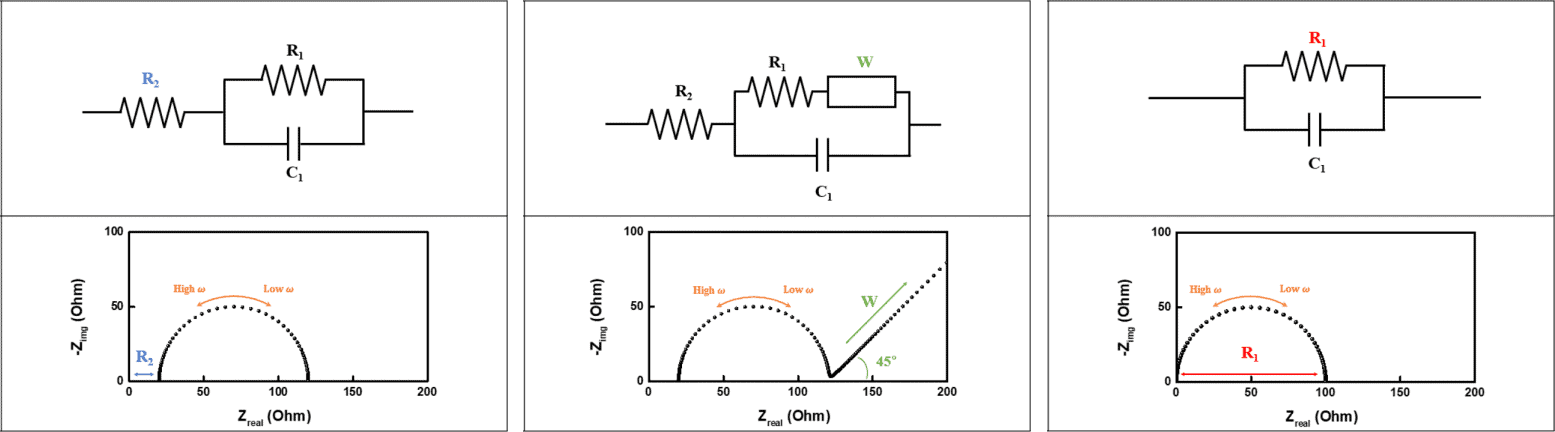

Choi W, Shin HC, Kim JM, Choi JY, Yoon WS. Modeling and Applications of Electrochemical Impedance Spectroscopy (EIS) for Lithium-ion Batteries. J Electrochem Sci Technol. 2020;11(1):1-13. Published online 2020 Jan 20. doi: https://doi.org/10.33961/jecst.2019.00528.

[Joe] Properties of the EIS spectrum can be correlated with properties of specific regions of the cell. (Biologic.net "Why use EIS for battery research?" (June 2023)) suggests that high frequencies correspond to the ohmic resistance of the electrolyte, the middle frequencies to SEI capacitance and the electron transfer rate and low frequencies give the user information about the diffusion processes of species within the insertion material. However, this information should be verified against another source, given that biologic do not cite a source for this and they seemingly manufacture cell cyclers (conflict of interest).

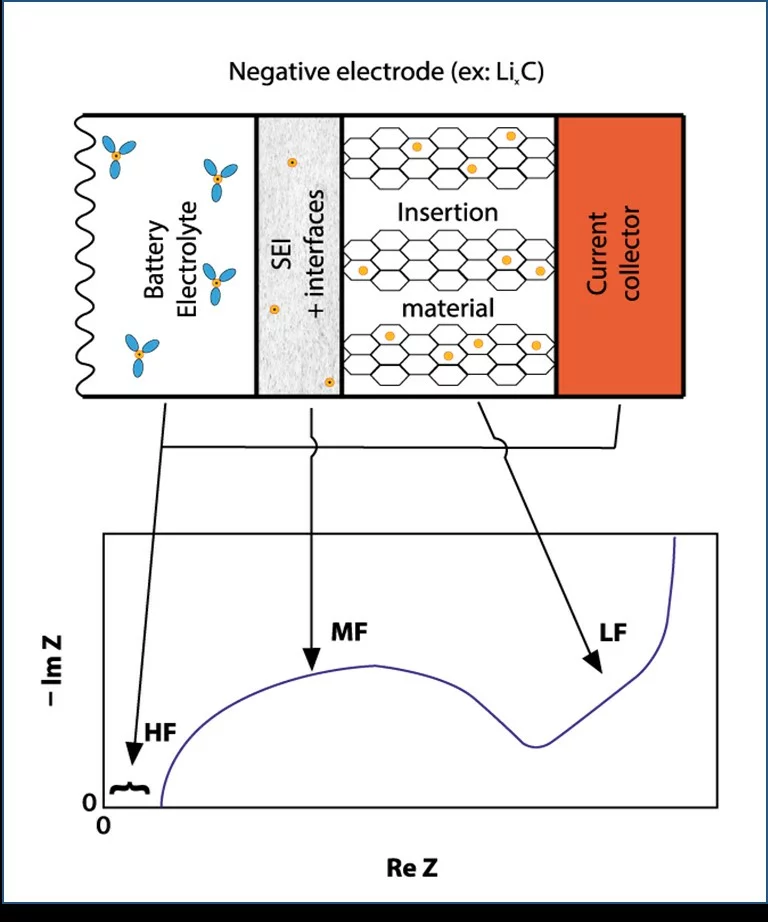

Westerhoff et Al also suggest that the ECM can be used to extrapolate information about each layer within the cell. In their results, a sufficiently complex ECM can be used to represent and model subsequent layers in the cell. These models consist of resistors, capacitors, inductors and constant phase elements. Differing levels of complexity yield different degrees of information about the cell.

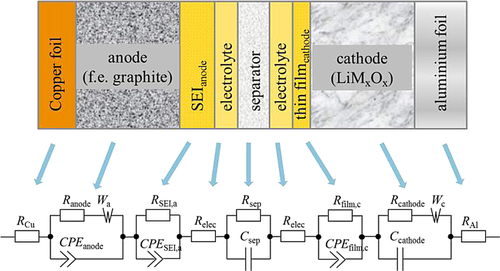

**Reference:**

Westerhoff, U., Kurbach, K., Lienesch, F. & Kurrat, M. Analysis of Lithium-Ion Battery Models Based on Electrochemical Impedance Spectroscopy. Energy Technol. 4, 1620–1630 (2016).

In [94]:
#@title Extract the specific data required and plot
from impedance.models.circuits import CustomCircuit
from impedance import preprocessing
from impedance.visualization import plot_nyquist
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit

def plot_single_spectrum(df, battery_name, show_frequency_gradient):
    """
    Plot the impedance spectrum of the battery.

    Parameters:
    df (pd.DataFrame): DataFrame with the impedance data.
    battery_name (str): Name of the battery.
    show_frequency_gradient (bool): If True, the points will be colored according to the frequency.

    """

    cycle_column, re_column, im_column, freq_column = 'cycle number', 'Re(Z)/Ohm', '-Im(Z)/Ohm', 'freq/Hz'
    fig = go.Figure()

    cycles = df[cycle_column].unique()
    traces = []
    buttons = []

    for i, cycle in enumerate(cycles):
        df_cycle = df[df[cycle_column] == cycle]
        if show_frequency_gradient:
            marker = dict(
                size=7,
                color=df_cycle[freq_column],
                colorscale='Viridis',
                colorbar=dict(
                    title='Frequency (Hz)',
                    thickness=15,
                    len=0.5
                )
            )
        else:
            marker = dict(
                size=5.5,
            )

        trace = go.Scatter(
            x=df_cycle[re_column],
            y=df_cycle[im_column],
            mode='markers',
            name=f'Cycle {int(cycle)}',
            marker=marker,
        )
        traces.append(trace)

    initial_visibility = [False] * len(cycles)
    for i, cycle in enumerate(cycles):
        button = dict(
            method='update',
            label=f'Cycle {int(cycle)}',
            visible=True,
            args=[{'visible': [(not visibility) if j == i else visibility for j, visibility in enumerate(initial_visibility)]},
                  {'title': f'Impedance Plot of Battery {battery_name}'}]
        )
        buttons.append(button)

    fig.update_layout(
        autosize=False,
        width=800,
        height=600,
        updatemenus=[
            dict(
                type='buttons',
                direction='right',
                x=1.1,
                y=1.1,
                buttons=buttons
            )
        ],
        title=f'Impedance Plot of Battery {battery_name}',
        xaxis_title='Re(Z)/Ohm',
        yaxis_title='-Im(Z)/Ohm',
        #yaxis=dict(range=[0, 0.01]),
        #xaxis=dict(range=[0.04, 0.065]),
        showlegend=True,
        legend=dict(orientation='v', x=1.02, y=1)
    )

    for trace in traces:
        fig.add_trace(trace)

    fig.show()

df = clean_data['NX001_2108']
cycle_103_df = df[df["cycle number"] == 103].reset_index(drop=True)

# Remove the second run of EIS data
freq_diff = cycle_103_df["freq/Hz"].diff().fillna(0)
first_increase_idx = freq_diff[freq_diff > 0].index[0]
df_NX001_2108_103 = cycle_103_df.iloc[:first_increase_idx]

df_NX001_2108_103 = df_NX001_2108_103[["|Z|/Ohm", "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm", "cycle number"]]

plot_single_spectrum(df_NX001_2108_103, 'NX001_2108', show_frequency_gradient=True)

# Remove rows with negative values in the "-Im(Z)" column
df_NX001_2108_103 = df_NX001_2108_103[df_NX001_2108_103["-Im(Z)/Ohm"] >= 0]

Above is a plot of the chosen cycle: NX001, 21/08/2023, cycle 103, 33% SOC.

In [95]:
#@title Define a function to fit the circuit model using impedance.py
def fit_ecm_model(df, circuit='R0-p(R1,C1)-p(R2-Wo1,C2)', number_of_components=7):
    """
    Fit an ECM model to the impedance data
    Parameters:
        df: the impedance data
        circuit: the equivalent circuit model to fit
        number_of_components: the number of components in the equivalent circuit model

    Outputs:
        Z_fit: the impedance data predicted by the fitted model
        fitted_params: the parameters of the fitted model
        mse: the mean squared error of the fitted model
    """

    initial_guess = [1] * number_of_components
    # Load data from df
    freq = df['freq/Hz'].values
    Z = df['Re(Z)/Ohm'].values - 1j * df['-Im(Z)/Ohm'].values

    circuit_model = CustomCircuit(circuit, initial_guess=initial_guess)
    circuit_model.fit(freq, Z)
    Z_fit = circuit_model.predict(freq)

    fitted_params = circuit_model.parameters_

    mse = mean_squared_error(np.real(Z), np.real(Z_fit)) + mean_squared_error(np.imag(Z), np.imag(Z_fit))

    return Z_fit, fitted_params, mse


### Choosing a model

Unfortunately, with limited time and little electrical background, existing research was leant heavily upon. One paper used data from lithium-ion batteries, tested a selection of circuit models, and illustrated similar appearing spectrum (Zhu et al., 2019). However, this paper used machine learning methods to fit their circuit models, which wasn't feasible for our dataset size. A wide array of circuits were tested, although most were clearly not valid and were discarded. The circuit model described by Westerhoff mentioned in the introduction to this section was also tested, but its result was a poor fit, so has not been included.



In [96]:
#@title Warning: This cell contains a very circuit that is very slow to fit
all_model_data = []
slow_circuit = ('R0-p(CPE1,R1)-p(CPE2,R2)-Wo1', 9)
model_data1, fitted_params1, mse1 = fit_ecm_model(df_NX001_2108_103, slow_circuit[0], slow_circuit[1])

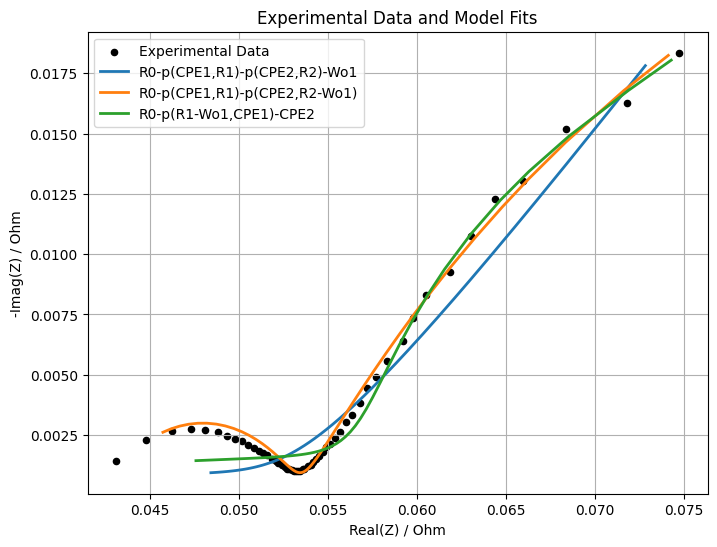

Parameters for circuit R0-p(CPE1,R1)-p(CPE2,R2)-Wo1: [7.49916080e-07 3.17468002e+01 1.35846648e-02 1.95356612e-01
 3.17396326e+01 1.36182191e-02 1.93565542e-01 3.40996328e-01
 3.52417383e+03]
MSE for circuit R0-p(CPE1,R1)-p(CPE2,R2)-Wo1: 2.57470065480461e-06
Parameters for circuit R0-p(CPE1,R1)-p(CPE2,R2-Wo1): [4.23429014e-02 4.14096171e-01 6.25875290e-01 1.10797254e-02
 1.61843957e+02 5.97300994e-01 1.03733005e-01 1.32517647e-10
 1.95509700e+02]
MSE for circuit R0-p(CPE1,R1)-p(CPE2,R2-Wo1): 3.2715179061232345e-07
Parameters for circuit R0-p(R1-Wo1,CPE1)-CPE2: [1.24613037e-26 1.68049194e-02 1.74820196e-01 2.00104079e+03
 4.00558372e+02 1.00000000e+00 1.74534879e+01 1.92393202e-02]
MSE for circuit R0-p(R1-Wo1,CPE1)-CPE2: 1.2559715164343796e-06


In [99]:
#@title Run remaining circuits and plot
import matplotlib.pyplot as plt

all_model_data = []
all_model_data.append((model_data1, fitted_params1, slow_circuit[0], mse1))

circuit_models = [('R0-p(CPE1,R1)-p(CPE2,R2-Wo1)', 9), ('R0-p(R1-Wo1,CPE1)-CPE2', 8)]

for circuit, number_of_components in circuit_models:
    model_data, fitted_params, mse = fit_ecm_model(df_NX001_2108_103, circuit, number_of_components)
    all_model_data.append((model_data, fitted_params, circuit, mse))

# Plotting Z and model data
plt.figure(figsize=(8, 6), dpi = 100)
plt.scatter(df_NX001_2108_103['Re(Z)/Ohm'], df_NX001_2108_103['-Im(Z)/Ohm'], color='black', s=20, label='Experimental Data')
for model_data, _, circuit, _ in all_model_data:
    plt.plot(np.real(model_data), -np.imag(model_data), '-', label=circuit, linewidth=2)
plt.xlabel('Real(Z) / Ohm')
plt.ylabel('-Imag(Z) / Ohm')
plt.title('Experimental Data and Model Fits')
plt.legend()
plt.grid(True)
plt.show()

for model_data, fitted_params, circuit, mse in all_model_data:
    print(f'Parameters for circuit {circuit}: {fitted_params}')
    print(f'MSE for circuit {circuit}: {mse}')

From this analysis, it was found that impedance.py is streamlined and easy to use, but its very slow for complex circuit models. While the slow circuit didn't turn out to be a good fit, it is a good illustration of how testing new circuits can be very time consuming with this software, and it's not clear which circuits will take longer or shorter to run. There is also little control over how it runs, so it doesn't seem to be the best option to use. One useful learning, was that the R0-p(CPE1,R1)-p(CPE2,R2-Wo1) circuit gave the best fit, with an MSE of just 3.27x10^-7. The parameters found were:

- **R0**: 4.23 × 10<sup>-2</sup> Ω
- **CPE1**: Q_1 = 4.14 × 10<sup>-1</sup>, n_1 = 6.26 × 10<sup>-1</sup>
- **R1**: 1.11 × 10<sup>-2</sup> Ω
- **CPE2**: Q_2 = 1.62 × 10<sup>2</sup> Ω, n_2 = 5.97 × 10<sup>-1</sup>
- **R2**: 1.04 × 10<sup>-1</sup> Ω
- **Wo1**: A = 1.33 × 10<sup>-10</sup> Ω, B = 1.96 × 10<sup>2</sup> Ω

These are all fairly reasonable parameters, and the smallest resistances R0, R1 and R2 suggest they may not be needed. Next, we can try all permuations of removing R0, R1 and R2 or a combination of them, to see which plots are still accurate.

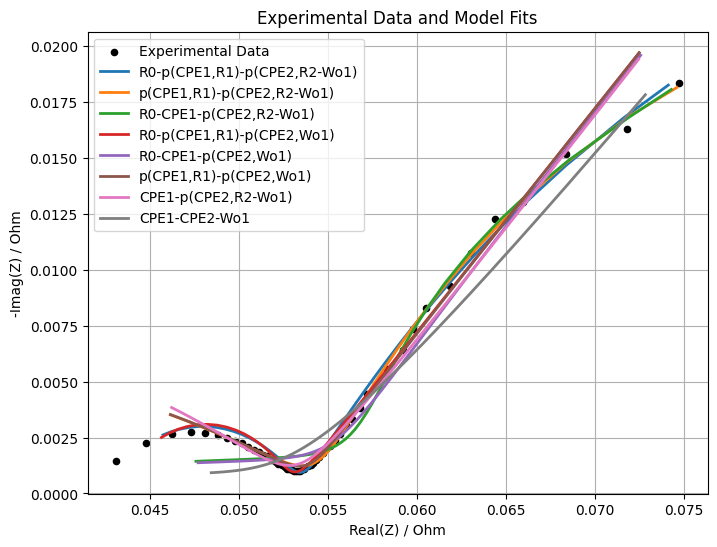

In [100]:
#@title Try removing R0, R1, and R2
all_model_data = []

circuit_models = [('R0-p(CPE1,R1)-p(CPE2,R2-Wo1)', 9), ('p(CPE1,R1)-p(CPE2,R2-Wo1)', 8), ('R0-CPE1-p(CPE2,R2-Wo1)', 8), ('R0-p(CPE1,R1)-p(CPE2,Wo1)', 8), ('R0-CPE1-p(CPE2,Wo1)', 7), ('p(CPE1,R1)-p(CPE2,Wo1)', 7), ('CPE1-p(CPE2,R2-Wo1)', 7), ('CPE1-CPE2-Wo1', 6)]

for circuit, number_of_components in circuit_models:
    model_data, fitted_params, mse = fit_ecm_model(df_NX001_2108_103, circuit, number_of_components)
    all_model_data.append((model_data, fitted_params, circuit, mse))

# Plotting Z and model data
plt.figure(figsize=(8, 6), dpi = 100)
plt.scatter(df_NX001_2108_103['Re(Z)/Ohm'], df_NX001_2108_103['-Im(Z)/Ohm'], color='black', s=20, label='Experimental Data')
for model_data, _, circuit, _ in all_model_data:
    plt.plot(np.real(model_data), -np.imag(model_data), '-', label=circuit, linewidth=2)
plt.xlabel('Real(Z) / Ohm')
plt.ylabel('-Imag(Z) / Ohm')
plt.title('Experimental Data and Model Fits')
plt.legend()
plt.grid(True)
plt.show()

Evidently, some combination of R0, R1 and R2 is required, as many of the graphs no longer fit. This is interesting, as it highlights which components contribute to which aspects of the plot. Only one remains a good option even with the simplification, R0-p(CPE1,R1)-p(CPE2,Wo1). Note, the original circuit without any resistors removed is shown on the plot in blue.

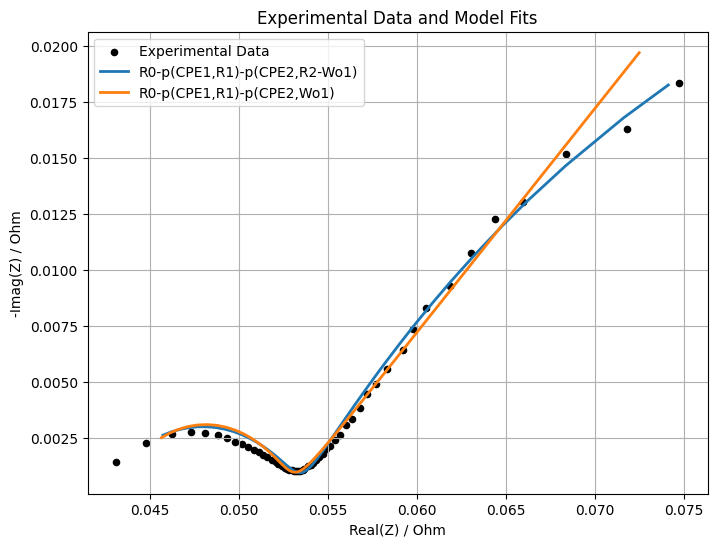

Parameters for circuit R0-p(CPE1,R1)-p(CPE2,R2-Wo1): [4.23429014e-02 4.14096171e-01 6.25875290e-01 1.10797254e-02
 1.61843957e+02 5.97300994e-01 1.03733005e-01 1.32517647e-10
 1.95509700e+02]
MSE for circuit R0-p(CPE1,R1)-p(CPE2,R2-Wo1): 3.2715179061232345e-07
Parameters for circuit R0-p(CPE1,R1)-p(CPE2,Wo1): [4.31592471e-02 2.36886911e-01 7.11644566e-01 9.67973235e-03
 7.27052732e-01 1.00000000e+00 2.07027835e-01 9.45524134e+02]
MSE for circuit R0-p(CPE1,R1)-p(CPE2,Wo1): 5.06461259269949e-07


In [101]:
#@title Compare the two results
all_model_data = []

circuit_models = [('R0-p(CPE1,R1)-p(CPE2,R2-Wo1)', 9), ('R0-p(CPE1,R1)-p(CPE2,Wo1)', 8)]

for circuit, number_of_components in circuit_models:
    model_data, fitted_params, mse = fit_ecm_model(df_NX001_2108_103, circuit, number_of_components)
    all_model_data.append((model_data, fitted_params, circuit, mse))

# Plotting Z and model data
plt.figure(figsize=(8, 6), dpi = 100)
plt.scatter(df_NX001_2108_103['Re(Z)/Ohm'], df_NX001_2108_103['-Im(Z)/Ohm'], color='black', s=20, label='Experimental Data')
for model_data, _, circuit, _ in all_model_data:
    plt.plot(np.real(model_data), -np.imag(model_data), '-', label=circuit, linewidth=2)
plt.xlabel('Real(Z) / Ohm')
plt.ylabel('-Imag(Z) / Ohm')
plt.title('Experimental Data and Model Fits')
plt.legend()
plt.grid(True)
plt.show()

for model_data, fitted_params, circuit, mse in all_model_data:
    print(f'Parameters for circuit {circuit}: {fitted_params}')
    print(f'MSE for circuit {circuit}: {mse}')

While the simplified circuit captures the features well for high frequencies, it performs less well for low frequencies. This shows that even though the resistance values are small, every component is needed. R0-p(CPE1,R1)-p(CPE2,R2-Wo1) will be used for further analysis.

While this package worked well, it does give a bit less control as you are working with a preprescribed package. Next, the previous plots were attempted to be replicated using scipy.optimize.

In [102]:
#@title Define the components and the circuit model
# Define the elements of the circuit model
def Z_R(R, omega):
    """
    Calculate the impedance of a resistor.

    Parameters:
    R (float): Resistance value.
    omega (float): Angular frequency.

    Returns:
    complex: Impedance of the resistor.
    """

    return R

def Z_CPE(Q, n, omega):
    """
    Calculate the impedance of a constant phase element.

    Parameters:
    Q (float): Constant phase element parameter.
    n (float): Constant phase element parameter.
    omega (float): Angular frequency.

    Returns:
    complex: Impedance of the constant phase element.
    """
    epsilon = 1e-8
    return 1 / (Q * (1j * omega + epsilon)**n)

def Z_W(A, omega):
    """
    Calculate the impedance of a Warburg element.

    Parameters:
    A (float): Warburg element parameter.
    omega (float): Angular frequency.

    Returns:
    complex: Impedance of the Warburg element.
    """
    epsilon = 1e-8
    return A / np.sqrt(1j * omega + epsilon)

# Define the full circuit model: R0-p(CPE1,R1)-p(CPE2,R2-Wo1)
def circuit_model(freq, R0, Q1, n1, R1, Q2, n2, R2, A):
    """
    Calculate the impedance of the full circuit model.

    Parameters:
    freq (float): Frequency.
    R0 (float): Resistance value.
    Q1 (float): Constant phase element parameter.
    n1 (float): Constant phase element parameter.
    R1 (float): Resistance value.
    Q2 (float): Constant phase element parameter.
    n2 (float): Constant phase element parameter.
    R2 (float): Resistance value.
    A (float): Warburg element parameter.

    Returns:
    np.array: Real and imaginary parts of the impedance.
    """

    omega = 2 * np.pi * freq
    Z_R0 = Z_R(R0, omega)
    Z_CPE1_R1 = 1 / (1 / Z_CPE(Q1, n1, omega) + 1 / Z_R(R1, omega))
    Z_R2_Wo1 = Z_R(R2, omega) + Z_W(A, omega)
    Z_CPE2_R2_Wo1 = 1 / (1 / Z_CPE(Q2, n2, omega) + 1 / Z_R2_Wo1)
    Z_total = Z_R0 + Z_CPE1_R1 + Z_CPE2_R2_Wo1
    return np.concatenate((Z_total.real, Z_total.imag))

Optimized parameters: [0.04439674 0.02429772 1.00118993 0.00650554 0.99996657 0.99980543
 0.00199657 0.00671809]
Mean Squared Error (MSE): 4.400509920632424e-07


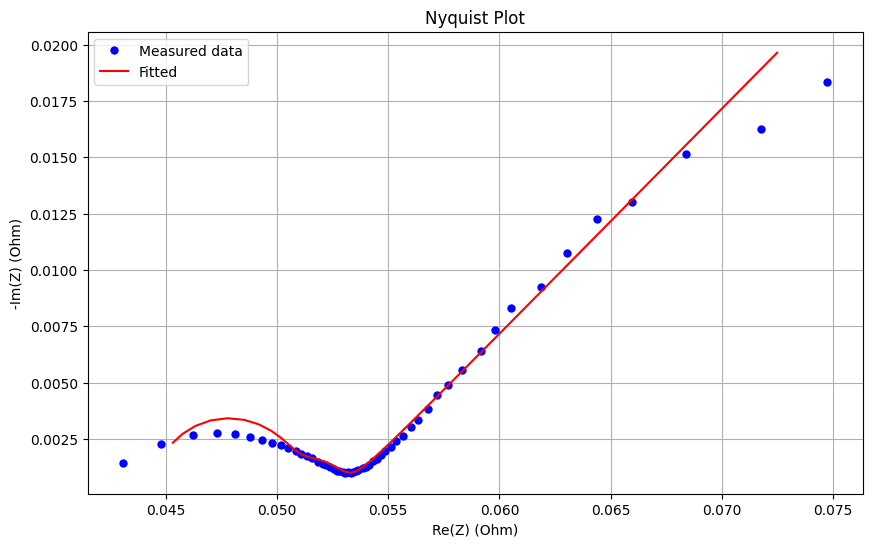

In [103]:
#@title Fit model and plot
#Load data
df = df_NX001_2108_103[["|Z|/Ohm", "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm", "cycle number"]]
frequencies = df["freq/Hz"].values
Z_real = df["Re(Z)/Ohm"].values
Z_imag = -df["-Im(Z)/Ohm"].values
Z_data = np.concatenate((Z_real, Z_imag))

# Define the objective function (mean squared error)
def objective_function(params):
    fitted_Z = circuit_model(frequencies, *params)
    fitted_Z_real = fitted_Z[:len(frequencies)]
    fitted_Z_imag = fitted_Z[len(frequencies):]
    mse = np.mean((fitted_Z_real - Z_real)**2 + (fitted_Z_imag - Z_imag)**2)
    return mse

# Define initial guess
initial_guess = [0.05, 0.01, 1, 0.01, 1, 1, 0.001, 0.005]

# Optimize initial conditions
result = minimize(objective_function, initial_guess)
optimized_params = result.x

# Print optimized parameters and MSE
print("Optimized parameters:", optimized_params)
print("Mean Squared Error (MSE):", result.fun)

# Plotting
fitted_Z = circuit_model(frequencies, *optimized_params)
fitted_Z_real = fitted_Z[:len(frequencies)]
fitted_Z_imag = fitted_Z[len(frequencies):]

plt.figure(figsize=(10, 6), dpi = 100)
plt.plot(Z_real, -Z_imag, 'bo', label='Measured data', markersize=5)
plt.plot(fitted_Z_real, -fitted_Z_imag, 'r-', label='Fitted')
plt.xlabel('Re(Z) (Ohm)')
plt.ylabel('-Im(Z) (Ohm)')
plt.legend()
plt.title('Nyquist Plot')
plt.grid(True)
plt.show()

Clearly, there is something going wrong with the fitting, as the curve is fitting well in the densely populated region but much less well on the left and right of this region where there is less data.

This is likely due to the MSE being evenly weighted, so it can reach the tolerance by fitting well in the area where there are more data points, and less well where there are fewer data points and hence less penalty is small. To help fix the issue, a weighting array `weights` was tested, that assigns a weight of 0.1 to the data points in the mid-section (between 0.0473 and 0.0583 Re(Z)/Ohm). The aim of this was to reduces the influence of these points on the MSE calculation, addressing the over-weighting issue. The code for this can be found in ECM_analysis.ipynb.

However, even with adjusted parameters, this did not solve the issue, producing a near-identical graph to the above. Instead, a more complex approach using SciKit's kernel density estimator (KDE) was tested (Pedregosa et al., 2011). The idea of this is to produce a probability density function that describes where the points lie, so that the sampling can be performed in a manner that is proportional to the density of data. This way, the data is evenly weighted in the optimisation algorithm.

In the code cell below, the `sampling_ratio` can be moved between 0+ and 1, with 1 being every data point is included and 0 meaning no data points are selected.

Optimized parameters: [3.88545480e-02 5.00069700e-01 5.00322135e-01 1.41153564e-02
 5.00000195e-01 4.99998661e-01 1.79148217e-04 6.34954671e-03]
Mean Squared Error (MSE): 8.462275516625079e-07


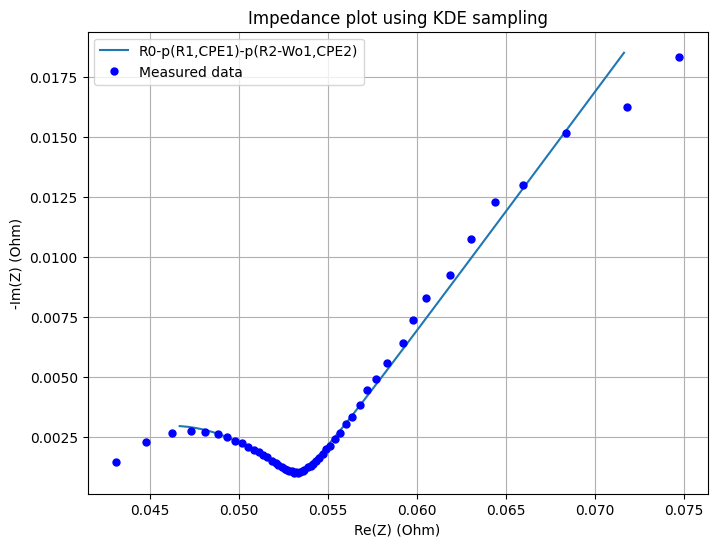

In [104]:
#@title Plot using KDE
from sklearn.neighbors import KernelDensity

def fit_circuit_model_KDE(df, circuit_model, initial_guesses, bandwidth=0.001, sampling_ratio=1):
    """
    Fits a circuit model to impedance data using Kernel Density Estimation for sampling.

    Parameters:
        df (DataFrame): DataFrame containing impedance data with columns "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm".
        circuit_model (function): Circuit model function to fit the data.
        initial_guesses (list): List of initial guesses for the parameters of the circuit model.
        bandwidth (float, optional): Bandwidth parameter for Kernel Density Estimation. Default is 0.001.
        sampling_ratio (float, optional): Ratio of sampled points to total points. Default is 1 (no sampling).

    Returns:
        optimized_params (list): Optimized parameters for the circuit model.
        mse (float): Mean squared error for the circuit model.
    """

    frequencies = df["freq/Hz"].values
    Z_real = df["Re(Z)/Ohm"].values
    Z_imag = -df["-Im(Z)/Ohm"].values

    # Perform Kernel Density Estimation on Re(Z)
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(Z_real[:, None])
    log_densities = kde.score_samples(Z_real[:, None])
    densities = np.exp(log_densities)

    # Normalize densities to create sampling probabilities
    sampling_probabilities = densities / densities.sum()

    # Sample points based on the computed probabilities
    num_samples = int(sampling_ratio * len(Z_real))
    np.random.seed(42)  # For reproducibility
    sampled_indices = np.random.choice(len(Z_real), size=num_samples, replace=False, p=sampling_probabilities)

    # Select sampled points
    selected_frequencies = frequencies[sampled_indices]
    selected_Z_real = Z_real[sampled_indices]
    selected_Z_imag = Z_imag[sampled_indices]

    # Define the objective function (mean squared error)
    def objective_function(params):
        fitted_Z = circuit_model(selected_frequencies, *params)
        fitted_Z_real = fitted_Z[:len(selected_frequencies)]
        fitted_Z_imag = fitted_Z[len(selected_frequencies):]

        mse = np.mean((fitted_Z_real - selected_Z_real)**2 + (fitted_Z_imag - selected_Z_imag)**2)
        return mse

    # Define bounds for each parameter (greater than zero and realistic numbers)
    bounds = [(1e-6, None) for _ in range(len(initial_guesses))]

    # Optimize initial conditions with bounds
    result = minimize(objective_function, initial_guesses, bounds=bounds)
    optimized_params = result.x

    # Calculate MSE on the full data
    fitted_Z_full = circuit_model(frequencies, *optimized_params)
    fitted_Z_real_full = fitted_Z_full[:len(frequencies)]
    fitted_Z_imag_full = fitted_Z_full[len(frequencies):]
    mse_full = np.mean((fitted_Z_real_full - Z_real)**2 + (fitted_Z_imag_full - Z_imag)**2)

    # Print optimized parameters and MSE
    print(f"Optimized parameters: {optimized_params}")
    print(f"Mean Squared Error (MSE): {mse_full}")

    # Plotting
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)

    plt.plot(fitted_Z_real_full, -fitted_Z_imag_full, label='R0-p(R1,CPE1)-p(R2-Wo1,CPE2)')

    plt.plot(Z_real, -Z_imag, 'bo', label='Measured data', markersize=5)
    plt.xlabel('Re(Z) (Ohm)')
    plt.ylabel('-Im(Z) (Ohm)')
    plt.legend()
    plt.title('Impedance plot using KDE sampling')
    plt.grid(True)
    plt.show()

    return optimized_params, mse_full

def circuit_model_1(freq, *params):
    R0, Q1, n1, R1, Q2, n2, R2, A = params[:8]
    omega = 2 * np.pi * freq
    Z_R0 = Z_R(R0, omega)
    Z_CPE1_R1 = 1 / (1 / Z_CPE(Q1, n1, omega) + 1 / Z_R(R1, omega))
    Z_R2_Wo1 = Z_R(R2, omega) + Z_W(A, omega)
    Z_CPE2_R2_Wo1 = 1 / (1 / Z_CPE(Q2, n2, omega) + 1 / Z_R2_Wo1)
    Z_total = Z_R0 + Z_CPE1_R1 + Z_CPE2_R2_Wo1
    return np.concatenate((Z_total.real, Z_total.imag))

initial_guesses = [0.05, 0.5, 0.5, 0.005, 0.5, 0.5, 0.0005, 0.005]

optimized_params, mse = fit_circuit_model_KDE(df_NX001_2108_103, circuit_model_1, initial_guesses, bandwidth=0.001, sampling_ratio=0.5) #Change sampling ratio here



This resulting fit is much better. The MSE is 8.46 × 10^-7, and the parameters for this circuit are:

- **R0**: 3.88 × 10^-2 Ω
- **CPE1**: Q_1 = 5.00 × 10^-1, n_1 = 5.00 × 10^-1
- **R1**: 1.41 × 10^-2 Ω
- **CPE2**: Q_2 = 5.00000101e-1 Ω, n_2 = 5.00 × 10^-1
- **R2**: 1.87 × 10^-4 Ω
- **Wo1**: A = 6.33 × 10^-3 Ω, B = 1.33 × 10^-10 Ω

One effect that has appeared is that there is no generated fitting for the first few data points, as seen on the left hand side of the plot. There were suspicions that this was due to the sampling, but when when the first 5 data points are ensured to be included, the fit is much less tight, as can be seen below. Note the number of data points to use can be changed in the final line of the box (n), along with whether KDE is used and the sampling ratio, as before.

Optimized parameters for R0-p(R1,CPE1)-p(R2-Wo1,CPE2): [4.33535130e-02 1.30444947e+00 9.12086061e-01 2.57334355e-04
 2.20011469e-01 7.31102243e-01 9.21923832e-03 6.41386254e-03]
Optimized parameters for R0-p(R1,C)-p(R2,C)-Wo1: [0.04455238 0.00633373 0.02724218 0.00188372 1.40363824 0.00643013]


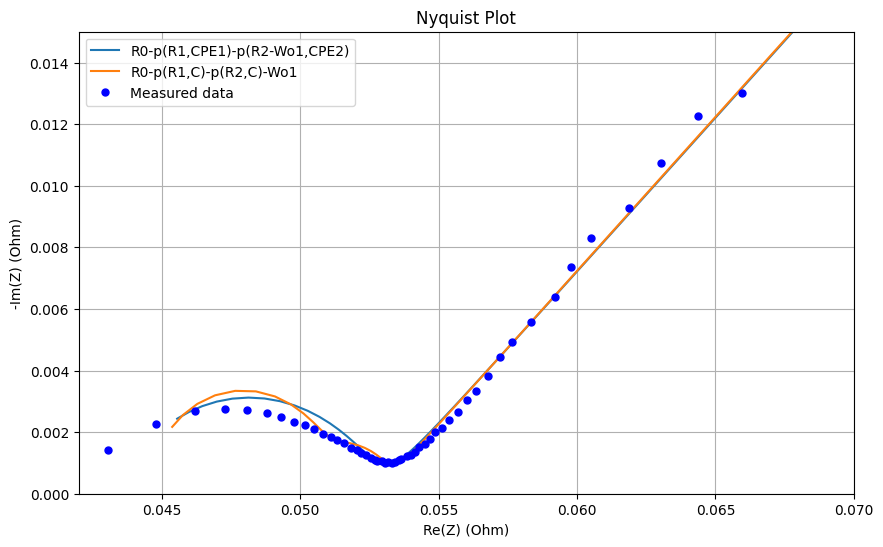

In [ ]:
#@title Force the use of the first 5 data points, compare to other circuit models
def fit_multiple_circuit_models_KDE(df, circuit_models, initial_guesses, n=0, use_kde=True, bandwidth=0.001, sampling_ratio=0.5):
    """
    Fits multiple circuit models to impedance data using curve_fit or KDE for sampling.

    Parameters:
        df (DataFrame): DataFrame containing impedance data with columns "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm".
        circuit_models (list): List of circuit model functions to fit the data.
        initial_guesses (list): List of initial guesses for the parameters of each circuit model.
        use_kde (bool, optional): Whether to use Kernel Density Estimation for sampling. Default is True.

    Returns:
        optimized_params_list (list): List of optimized parameters for each circuit model.
        mse_list (list): List of mean squared errors for each circuit model.
    """
    fig, ax = plt.subplots(figsize=(10, 6), dpi=100)

    frequencies = df["freq/Hz"].values
    Z_real = df["Re(Z)/Ohm"].values
    Z_imag = -df["-Im(Z)/Ohm"].values
    num_models = len(circuit_models)

    optimized_params_list = []
    mse_list = []

    for i in range(num_models):
        if use_kde:
            # Perform Kernel Density Estimation on Re(Z)
            kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(Z_real[:, None])
            log_densities = kde.score_samples(Z_real[:, None])
            densities = np.exp(log_densities)

            # Normalize densities to create sampling probabilities
            sampling_probabilities = densities / densities.sum()

            # Sample points based on the computed probabilities
            num_samples = int(sampling_ratio * len(Z_real))
            np.random.seed(42)  # For reproducibility

            # Ensure the first n data points are always included
            first_n_indices = np.arange(n)
            other_indices = np.random.choice(len(Z_real) - n, size=num_samples - n, replace=False, p=sampling_probabilities[n:] / sampling_probabilities[n:].sum()) # Normalize probabilities
            sampled_indices = np.concatenate((first_n_indices, other_indices))

            selected_frequencies = frequencies[sampled_indices]
            selected_Z_real = Z_real[sampled_indices]
            selected_Z_imag = Z_imag[sampled_indices]

        else:
            selected_frequencies = frequencies
            selected_Z_real = Z_real
            selected_Z_imag = Z_imag

        def objective_function(freq, *params):
            fitted_Z = circuit_models[i](freq, *params)
            fitted_Z_real_selected = fitted_Z[:len(freq)]
            fitted_Z_imag_selected = fitted_Z[len(freq):]
            return np.concatenate((fitted_Z_real_selected, fitted_Z_imag_selected))

        # Optimize initial conditions with curve_fit
        optimized_params, _ = curve_fit(objective_function, selected_frequencies, np.concatenate((selected_Z_real, selected_Z_imag)), p0=initial_guesses[i], bounds=(0, np.inf), maxfev=10000)


        # Print optimized parameters for the current model
        print(f"Optimized parameters for {get_model_name(circuit_models[i])}: {optimized_params}")

        optimized_params_list.append(optimized_params)
        fitted_values = objective_function(selected_frequencies, *optimized_params)
        mse_list.append(np.mean((fitted_values - np.concatenate((selected_Z_real, selected_Z_imag)))**2))

        # Plotting
        model_name = get_model_name(circuit_models[i])
        fitted_Z = circuit_models[i](frequencies, *optimized_params)
        fitted_Z_real = fitted_Z[:len(frequencies)]
        fitted_Z_imag = fitted_Z[len(frequencies):]

        plt.plot(fitted_Z_real, -fitted_Z_imag, label=model_name)

    plt.plot(Z_real, -Z_imag, 'bo', label='Measured data', markersize=5)
    plt.xlabel('Re(Z) (Ohm)')
    plt.ylabel('-Im(Z) (Ohm)')
    #set xlim and ylim
    plt.xlim(0.042, 0.07)
    plt.ylim(0.0, 0.015)
    plt.legend()
    plt.title('Nyquist Plot')
    plt.grid(True)
    plt.show()

    return optimized_params_list, mse_list

def get_model_name(model_function):
    if model_function.__name__ == 'circuit_model_1':
        return 'R0-p(R1,CPE1)-p(R2-Wo1,CPE2)'
    elif model_function.__name__ == 'circuit_model_2':
        return 'R0-p(R1,C)-p(R2,C)-Wo1'
    elif model_function.__name__ == 'circuit_model_3':
        return 'R0-p(R1,CPE1)-p(R2,C)-Wo1'
    else:
        return 'Unknown Model'

def circuit_model_1(freq, *params):
    R0, Q1, n1, R1, Q2, n2, R2, A = params[:8]
    omega = 2 * np.pi * freq
    Z_R0 = Z_R(R0, omega)
    Z_CPE1_R1 = 1 / (1 / Z_CPE(Q1, n1, omega) + 1 / Z_R(R1, omega))
    Z_R2_Wo1 = Z_R(R2, omega) + Z_W(A, omega)
    Z_CPE2_R2_Wo1 = 1 / (1 / Z_CPE(Q2, n2, omega) + 1 / Z_R2_Wo1)
    Z_total = Z_R0 + Z_CPE1_R1 + Z_CPE2_R2_Wo1
    return np.concatenate((Z_total.real, Z_total.imag))

def circuit_model_2(freq, *params):
    R0, R1, C1, R2, C2, A = params[:6]
    omega = 2 * np.pi * freq
    Z_R0 = R0
    Z_RC1 = R1 / (1 + 1j * omega * R1 * C1)
    Z_RC2 = R2 / (1 + 1j * omega * R2 * C2)
    Z_Wo1 = A / np.sqrt(1j * omega)
    Z_total = Z_R0 + Z_RC1 + Z_RC2 + Z_Wo1
    return np.concatenate((Z_total.real, Z_total.imag))

circuit_models = [circuit_model_1, circuit_model_2]

initial_guesses = [
    [0.05, 0.5, 0.5, 0.005, 0.5, 0.5, 0.0005, 0.005],
    [0.05, 0.005, 0.00005, 0.005, 0.005, 0.00005]
]

optimized_params, mse = fit_multiple_circuit_models_KDE(df_NX001_2108_103, circuit_models, initial_guesses, n=3, use_kde=True, sampling_ratio=0.8) #Choose n, the number of initial data points to force the inclusion


While the line does project further than before, the graphs fit less well as a result. This is not expected, so this should be investigated further.

Finally, this circuit model will be applied to two different batteries, the SG and the RS.

In [ ]:
#@title Extract the specific data required and plot for RS001

df = clean_data['RS001_2108']
cycle_103_df = df[df["cycle number"] == 103].reset_index(drop=True)

# Remove the second run of EIS data
freq_diff = cycle_103_df["freq/Hz"].diff().fillna(0)
first_increase_idx = freq_diff[freq_diff > 0].index[0]
df_RS001_2108_103 = cycle_103_df.iloc[:first_increase_idx]

df_RS001_2108_103 = df_RS001_2108_103[["|Z|/Ohm", "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm", "cycle number"]]

plot_single_spectrum(df_RS001_2108_103, 'RS001_2108', show_frequency_gradient=True)

# Remove rows with negative values in the "-Im(Z)" column
df_RS001_2108_103 = df_RS001_2108_103[df_RS001_2108_103["-Im(Z)/Ohm"] >= 0]

Above is a plot of the chosen cycle: RS001, 21/08/2023, cycle 103, 33% SOC.

Optimized parameters: [1.72181529e-02 5.00010362e-01 5.00022746e-01 1.77729772e-03
 5.00000645e-01 5.00001057e-01 1.00000000e-06 4.29083101e-03]
Mean Squared Error (MSE): 3.0273255681617646e-07


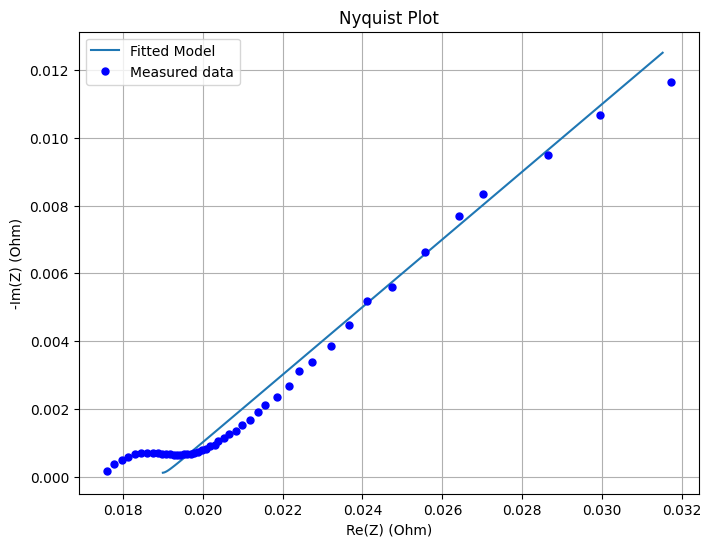

In [ ]:
#@title Attempt to fit previous circuit model
initial_guesses = [0.05, 0.5, 0.5, 0.005, 0.5, 0.5, 0.0005, 0.005]

optimized_params, mse = fit_circuit_model_KDE(df_RS001_2108_103, circuit_model_1, initial_guesses, bandwidth=0.001, sampling_ratio=0.5) #Change sampling ratio here

In [ ]:
#@title Extract the specific data required and plot for SG009
df = clean_data['SG009_2108']
cycle_106_df = df[df["cycle number"] == 106].reset_index(drop=True)

# Remove the second run of EIS data
freq_diff = cycle_106_df["freq/Hz"].diff().fillna(0)
first_increase_idx = freq_diff[freq_diff > 0].index[0]
df_SG009_2108_106 = cycle_106_df.iloc[:first_increase_idx]

df_SG009_2108_106 = df_SG009_2108_106[["|Z|/Ohm", "freq/Hz", "Re(Z)/Ohm", "-Im(Z)/Ohm", "cycle number"]]

plot_single_spectrum(df_SG009_2108_106, 'SG009_2108', show_frequency_gradient=True)

# Remove rows with negative values in the "-Im(Z)" column
df_SG009_2108_106 = df_SG009_2108_106[df_SG009_2108_106["-Im(Z)/Ohm"] >= 0]

 Above is a plot of the chosen cycle: SG009, 21/08/2023, cycle 106, 33% SOC.

Optimized parameters: [1.57016122e-02 5.00087183e-01 5.00225227e-01 1.93831993e-02
 5.00000703e-01 4.99997134e-01 1.00000000e-06 3.55455184e-03]
Mean Squared Error (MSE): 1.284934766774553e-06


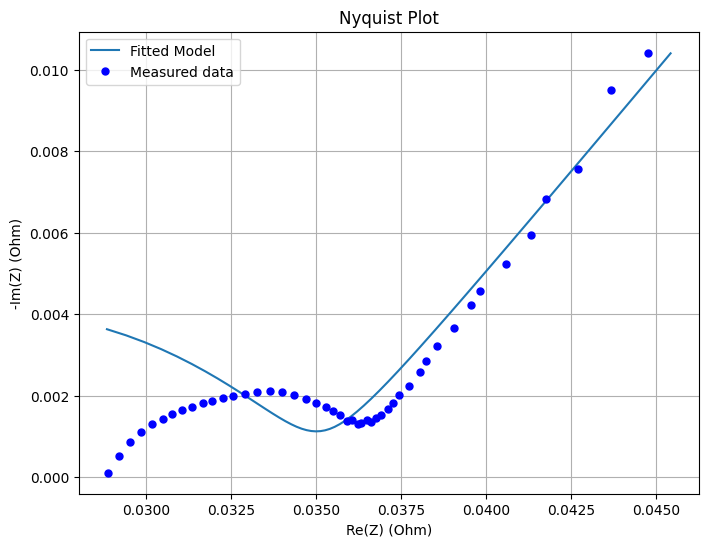

In [ ]:
#@title Attempt to fit previous circuit model
initial_guesses = [0.05, 0.5, 0.5, 0.005, 0.5, 0.5, 0.0005, 0.005]

optimized_params, mse = fit_circuit_model_KDE(df_SG009_2108_106, circuit_model_1, initial_guesses, bandwidth=0.001, sampling_ratio=0.5) #Change sampling ratio here

It is clear for both cells that the function cannot fit to the new shapes, at least not without tailoring the initial guesses, which is not ideal.

### Challenges
Clearly, one key challenge is that an ECM that fits well for one battery chemistry does not fit well with other batteries. Another challenge is the fact that EIS spectra are different for different states of charge, with the 33% test shapes differing from the 66% test shapes. The level of charge may need to be set.

In summary, there lots of different software packages that can be used to do this fitting, with software being very specific to EIS, while others, such as scipy, are designed for general optimisation. First Impedance.py was used, a python package designed specifically for this purpose, which gave a great fit, but was extremely slow. Next we tried SciPy, which was much quicker but worse fit, as the data in the middle of the plot is much more densely populated and is incorrectly weighting the result. This plot was  improved upon by something called Kernel Density Estimation. The idea of this was to sample data points proportionally to how close together they are, and this resulted in an improved fit. Overall, some close fitting was achieved with a particular circuit model (R0-p(R1,CPE1)-p(R2-Wo1,CPE2)), but this did not translate to close fitting on other battery types, at least for the same initial guesses. Providing alternative initial guesses may improve the results, but tailoring them too closely to the battery type defeats the purpose of a universal model. Unfortunately, there was not time to test pyEIS, so it is recommended that if analysis in this area is continued then this packaged should be explored too.

## Recommendations for future work

We believe that EIS is a more practical method for gathering data on cell health, as it is much quicker and less costly. It is possible to fit ECM models to EIS data, but further work is needed to assess model generality, computation time and prediction error. In particular, we recommend continuation with the following tasks:

1. Investigate further whether the ECM found is valid for the other battery types, find the error quantitively
1. Investigate how the parameters change with SOC and cycle number
1. Develop an algorithm that takes an EIS spectrum, fits the parameters of the ECM found earlier, and returns the error between the expected parameters and the actual parameters. Use the research on the physical link between ECM components and cell components to output an indication of what areas of the cell have unusual readings and therefore may be degrading, and to what extent. This may be tricky without any data for this, so we might need to find some online or create some.
1. Investigate whether it is possible to estimate current capacity of a cell from a single EIS reading, by finding the ECM and virtually cycling the model, producing a curve, and calculating capacity from that. This could be really powerful if possible, but would require strong understanding of how the model parameters change as the cell charges/discharges.

Future research could also consider new ways of gathering data. This could include crowdsourced, real world data or mutually beneficial collaborations with manufacturers. This may prove difficult due to many devices being limited to measuring whole battery characteristics, obscuring the influence of individual cell failures.

As reflected by Microsoft in their BatteryML work, it is unknown just how relevant laboratory cycling data is to real-world loading conditions. Models often standardise the cells loading conditions, resulting in an unusual contradiction where a model is trained on controlled laboratory data, only to be deployed on uncontrolled and variable loading scenarios.
This is precisely why we recommend that further research investigates alternate means of gathering cell data.

A model that we did not consider was based on work from Peter M. Attia et al (2022). They show that the "knee" behaviour of cell degradation is easier predicted than SoH. A possible future approach could consider a classifier model that judges whether a cell will pass its "knee" point in the near future. This may prove easier than a true capacity estimate, and is useful for 2nd life classification as a battery which has passed this point is unlikely to be useful for much longer. For example, a cell may reach 60% SoH but be usable, whilst another that has suffered a particularly harsh life may reach the knee point at 95% SoH.

Further detail on these recommendations and considerations can be found in the research summary on the wiki.

## Conclusion

The EIS analysis was particularly successful, with the provision of simple code for cleaning the data. The generation of a synthetic dataset was an interesting exercise, and introduced some new learnings on the degradation of batteries when not in use. The ECM fitting results were promising for the initial battery type, but the written algorithms failed to fit to other battery types. The investigation of pyEIS, a python package for ECM fitting, is a recommended next step, alongside further investigation into the relation between ECM components and the physical properties and chemical processes happening within a cell.

Overall, our project has aimed to provide a breadth of analysis, data visualisation and contextual research. We reached task 5 from our established task set, which is a good result. However, there is still significant work to be done in this area, and we recommend to future students that may pick up this project, to begin by continuing with the remaining tasks in this list.

## Bibliography


1.   Middlemiss LA, Rennie AJR, Sayers R, West AR. Characterisation of batteries by electrochemical impedance spectroscopy. Energy Reports. 2020;6(Suppl 5):232-41. doi: 10.1016/j.egyr.2020.03.029.
2.   Westerhoff, U., Kurbach, K., Lienesch, F. & Kurrat, M., 2016. Analysis of Lithium-Ion Battery Models Based on Electrochemical Impedance Spectroscopy. Energy Technology, 4(12), pp.1620-1630. Available at: https://doi.org/10.1002/ente.201600154.
1.   United Nations. "The 17 Goals." United Nations Sustainable Development. https://sdgs.un.org/goals. Accessed May 2023.
2.   Lifetime Cambridge. "Impact." Lifetime Cambridge, https://lifetimecambridge.co.uk/impact. Accessed May 2023.
2.   Murbach MD, Gerwe B, Dawson-Elli N, Tsui LK. impedance.py: A Python package for electrochemical impedance analysis. Journal of Open Source Software. 2020;5(52):2349. https://doi.org/10.21105/joss.02349
2.  Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020) SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272.
3.  Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011
2.  Scikit-learn contributors. Kernel Density Estimation. [Online]. Available from: https://scikit-learn.org/dev/auto_examples/neighbors/plot_digits_kde_sampling.html [Accessed 2024 June 6].
3.  Zhu S, Sun X, Wang Y, Zhao N, Sha J. Equivalent circuit model recognition of electrochemical impedance spectroscopy via machine learning. Journal of Electroanalytical Chemistry. 2019;855:113627. Available from: https://doi.org/10.1016/j.jelechem.2019.113627.
4.  Choi W, Shin HC, Kim JM, Choi JY, Yoon WS. Modeling and Applications of Electrochemical Impedance Spectroscopy (EIS) for Lithium-ion Batteries. Journal of Electrochemical Science and Technology. 2020;11(1):1-13. Published online 2020 Jan 20. doi: https://doi.org/10.33961/jecst.2019.00528.
2. Itou, Y. & Ukyo, Y. Performance of LiNiCoO2 materials for advanced lithium-ion batteries. J. Power
Sources 146, 39–44 (2005).
3. Kong, W., Li, H., Huang, X. & Chen, L. Gas evolution behaviors for several cathode materials in lithium-ion
batteries. J. Power Sources 142, 285–291 (2005).
4. Wang, Q., Sun, J., Yao, X. & Chen, C. Thermal stability of LiPF6/EC  +  DEC electrolyte with charged
electrodes for lithium ion batteries. Thermochim. Acta 437, 12–16 (2005).
5. Lohmann, N., Weßkamp, P., Haußmann, P., Melbert, J. & Musch, T. Electrochemical impedance
spectroscopy for lithium-ion cells: Test equipment and procedures for aging and fast characterization in
time and frequency domain. J. Power Sources 273, 613–623 (2015).
6. Dubarry, M. & Anseán, D. Best practices for incremental capacity analysis. Front. Energy Res. 10, (2022).
7. Fly, A. & Chen, R. Rate dependency of incremental capacity analysis (dQ/dV) as a diagnostic tool for
lithium-ion batteries. J. Energy Storage 29, 101329 (2020).
8.  Edge, Jacqueline & O'Kane, Simon & Prosser, Ryan & Kirkaldy, Niall & Patel, Anisha & Hales, Alastair & Ghosh, Abir & Ai, Weilong & Chen, Jingyi & Jiang, Jason & Li, Shen & Pang, Mei-Chin & Bravo Diaz, Laura & Tomaszewska, Anna & Marzook, Mohamed & Radhakrishnan, Karthik & Wang, Huizhi & Patel, Yatish & Wu, Billy & Offer, Gregory. (2021). Lithium Ion Battery Degradation: What you need to know. Physical Chemistry Chemical Physics. 23. 10.1039/D1CP00359C.


## Appendix

In this report there have been references to the following notebooks, which can be found in this repository: https://github.com/Technology-for-the-Poorest-Billion/2024-LiFETIME.

- General_analysis.ipynb
- EIS_analysis.ipynb
- ECM_analysis.ipynb

# Further Reading
Summaries and key takeaways from all papers we consulted throughout this report that aren't detailed here can be found in the github wiki.